In [1]:
import scanpy as sc
from matplotlib.patches import FancyArrowPatch
from scipy import sparse
import matplotlib.patches as mpatches
import warnings
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
import tempfile
import os
from scipy import stats
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from rpy2 import robjects as ro
from rpy2.robjects import pandas2ri
warnings.filterwarnings('ignore')

/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/rpy2/rinterface/__init__.py:1211: UserWarning: Environment variable "PWD" redefined by R and overriding existing variable. Current: "/", R: "/Users/siyuanzhao/Documents/GitHub/Biovis2025/Python"
  warnings.warn(
/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/rpy2/rinterface/__init__.py:1211: UserWarning: Environment variable "R_SESSION_TMPDIR" redefined by R and overriding existing variable. Current: "/var/folders/pm/_db3z8953vb1gtk99jkk_sb80000gn/T//RtmpU2kmxv", R: "/var/folders/pm/_db3z8953vb1gtk99jkk_sb80000gn/T//Rtmp0CDIjx"
  warnings.warn(


In [2]:
cell_ids_3 = [
    "40225",
    "40230",
    "40238",
    "40284",
    "40289",
    "40295",
    "40297",
    "40305",
    "40330",
    "40343",
    "40352",
    "40354",
    "40356",
    "40359",
    "40361",
    "40370",
    "40375",
    "40377",
    "40385",
    "40393",
    "40401",
    "40414",
    "40416",
    "40429",
    "40431",
    "40439",
    "40445",
    "40454",
    "40460",
    "40468",
    "40471",
    "40473",
    "40475",
    "40484",
    "40486",
    "40487",
    "40498",
    "40500",
    "40509",
    "40511",
    "40517",
    "40519",
    "40526",
    "40539",
    "40543",
    "40558",
    "40563",
    "40564",
    "40569",
    "40572",
    "40575",
    "40577",
    "40583",
    "40598",
    "40603",
    "40607",
    "40611",
    "40621",
    "40631",
    "40646",
    "40654",
    "40658",
    "40666",
    "40683",
    "40684",
    "40701",
    "40704",
    "40705",
    "40707",
    "40720",
    "40726",
    "40729",
    "40735",
    "40740",
    "40746",
    "40756",
    "40771",
    "40775",
    "40777",
    "40780",
    "40809",
    "40810",
    "40827",
    "40833",
    "40837",
    "40844",
    "40853",
    "40855",
    "40860",
    "40865",
    "40866",
    "40870",
    "40871",
    "40882",
    "40887",
    "40889",
    "40895",
    "40911",
    "40915",
    "40922",
    "40933",
    "40940",
    "40942",
    "40948",
    "40954",
    "40955",
    "40956",
    "40958",
    "40963",
    "40964",
    "40971",
    "40974",
    "40977",
    "40994",
    "40996",
    "41000",
    "41006",
    "41011",
    "41015",
    "41017",
    "41022",
    "41029",
    "41030",
    "41035",
    "41044",
    "41062",
    "41063",
    "41065",
    "41077",
    "41080",
    "41084",
    "41086",
    "41087",
    "41089",
    "41093",
    "41094",
    "41102",
    "41110",
    "41111",
    "41116",
    "41119",
    "41120",
    "41123",
    "41126",
    "41130",
    "41133",
    "41135",
    "41141",
    "41143",
    "41151",
    "41157",
    "41174",
    "41184",
    "41185",
    "41187",
    "41191",
    "41197",
    "41209",
    "41210",
    "41215",
    "41228",
    "41230",
    "41245",
    "41249",
    "41251",
    "41259",
    "41262",
    "41272",
    "41293",
    "41296",
    "41303",
    "41304",
    "41305",
    "41306",
    "41307",
    "41308",
    "41311",
    "41316",
    "41317",
    "41318",
    "41321",
    "41337",
    "41338",
    "41340",
    "41345",
    "41358",
    "41359",
    "41363",
    "41365",
    "41367",
    "41374",
    "41375",
    "41380",
    "41381",
    "41390",
    "41391",
    "41392",
    "41396",
    "41403",
    "41408",
    "41410",
    "41412",
    "41413",
    "41417",
    "41420",
    "41434",
    "41438",
    "41443",
    "41444",
    "41453",
    "41461",
    "41470",
    "41478",
    "41482",
    "41485",
    "41491",
    "41496",
    "41500",
    "41501",
    "41506",
    "41510",
    "41542",
    "41562",
    "41563",
    "41565",
    "41570",
    "41571",
    "41573",
    "41578",
    "41590",
    "41593",
    "41602",
    "41609",
    "41611",
    "41615",
    "41616",
    "41617",
    "41620",
    "41623",
    "41624",
    "41626",
    "41637",
    "41641",
    "41644",
    "41646",
    "41655",
    "41666",
    "41691",
    "41693",
    "41714",
    "41720",
    "41726",
    "41727",
    "41740",
    "41749",
    "41751",
    "41752",
    "41762",
    "41767",
    "41783",
    "41785",
    "41793",
    "41796",
    "41804",
    "41805",
    "41818",
    "41826",
    "41829",
    "41833",
    "41835",
    "41847",
    "41862",
    "41876",
    "41878",
    "41883",
    "41884",
    "41885",
    "41887",
    "41889",
    "41890",
    "41891",
    "41893",
    "41894",
    "41897",
    "41900",
    "41901",
    "41903",
    "41908",
    "41909",
    "41914",
    "41916",
    "41918",
    "41919",
    "41942",
    "41946",
    "41950",
    "41958",
    "41962",
    "41963",
    "41964",
    "41965",
    "41973",
    "41974",
    "41983",
    "41991",
    "41994",
    "41997",
    "41998",
    "42002",
    "42003",
    "42005",
    "42007",
    "42029",
    "42031",
    "42034",
    "42037",
    "42043",
    "42049",
    "42063",
    "42065",
    "42066",
    "42067",
    "42069",
    "42074",
    "42079",
    "42089",
    "42090",
    "42095",
    "42099",
    "42106",
    "42107",
    "42112",
    "42121",
    "42132",
    "42140",
    "42142",
    "42149",
    "42153",
    "42154",
    "42159",
    "42167",
    "42168",
    "42176",
    "42177",
    "42184",
    "42188",
    "42191",
    "42199",
    "42201",
    "42204",
    "42207",
    "42208",
    "42211",
    "42219",
    "42228",
    "42230",
    "42231",
    "42232",
    "42235",
    "42236",
    "42240",
    "42247",
    "42256",
    "42257",
    "42261",
    "42269",
    "42272",
    "42274",
    "42278",
    "42287",
    "42300",
    "42301",
    "42303",
    "42309",
    "42314",
    "42316",
    "42324",
    "42346",
    "42351",
    "42354",
    "42356",
    "42361",
    "42370",
    "42372",
    "42377",
    "42378",
    "42380",
    "42381",
    "42382",
    "42385",
    "42386",
    "42394",
    "42400",
    "42402",
    "42404",
    "42419",
    "42421",
    "42424",
    "42427",
    "42429",
    "42434",
    "42436",
    "42444",
    "42447",
    "42461",
    "42463",
    "42464",
    "42471",
    "42475",
    "42477",
    "42478",
    "42479",
    "42483",
    "42490",
    "42502",
    "42507",
    "42509",
    "42510",
    "42512",
    "42517",
    "42518",
    "42522",
    "42529",
    "42538",
    "42550",
    "42557",
    "42558",
    "42566",
    "42567",
    "42569",
    "42576",
    "42578",
    "42580",
    "42587",
    "42598",
    "42602",
    "42606",
    "42607",
    "42618",
    "42619",
    "42620",
    "42626",
    "42631",
    "42632",
    "42633",
    "42636",
    "42641",
    "42644",
    "42645",
    "42647",
    "42648",
    "42649",
    "42651",
    "42662",
    "42669",
    "42671",
    "42672",
    "42674",
    "42683",
    "42689",
    "42690",
    "42694",
    "42696",
    "42710",
    "42718",
    "42719",
    "42728",
    "42734",
    "42735",
    "42737",
    "42738",
    "42740",
    "42747",
    "42748",
    "42751",
    "42756",
    "42760",
    "42765",
    "42774",
    "42776",
    "42779",
    "42784",
    "42787",
    "42793",
    "42796",
    "42798",
    "42800",
    "42806",
    "42811",
    "42812",
    "42832",
    "42834",
    "42838",
    "42839",
    "42842",
    "42844",
    "42847",
    "42848",
    "42850",
    "42853",
    "42854",
    "42855",
    "42862",
    "42864",
    "42870",
    "42872",
    "42873",
    "42877",
    "42883",
    "42886",
    "42888",
    "42896",
    "42905",
    "42906",
    "42912",
    "42918",
    "42922",
    "42925",
    "42928",
    "42937",
    "42939",
    "42943",
    "42960",
    "42966",
    "42968",
    "42977",
    "42978",
    "42986",
    "42988",
    "42990",
    "42999",
    "43012",
    "43016",
    "43019",
    "43020",
    "43021",
    "43039",
    "43041",
    "43066",
    "43071",
    "43081",
    "43082",
    "43084",
    "43088",
    "43098",
    "43106",
    "43109",
    "43110",
    "43111",
    "43112",
    "43113",
    "43114",
    "43119",
    "43123",
    "43128",
    "43131",
    "43134",
    "43139",
    "43151",
    "43154",
    "43166",
    "43169",
    "43170",
    "43175",
    "43177",
    "43184",
    "43186",
    "43191",
    "43192",
    "43193",
    "43197",
    "43199",
    "43200",
    "43204",
    "43209",
    "43211",
    "43212",
    "43219",
    "43226",
    "43227",
    "43228",
    "43229",
    "43234",
    "43241",
    "43243",
    "43244",
    "43245",
    "43246",
    "43250",
    "43253",
    "43263",
    "43266",
    "43286",
    "43296",
    "43317",
    "43318",
    "43319",
    "43324",
    "43326",
    "43329",
    "43330",
    "43332",
    "43334",
    "43336",
    "43337",
    "43341",
    "43347",
    "43353",
    "43358",
    "43359",
    "43360",
    "43362",
    "43368",
    "43371",
    "43372",
    "43378",
    "43379",
    "43380",
    "43384",
    "43393",
    "43409",
    "43414",
    "43415",
    "43417",
    "43418",
    "43422",
    "43430",
    "43433",
    "43442",
    "43445",
    "43449",
    "43452",
    "43455",
    "43472",
    "43475",
    "43483",
    "43490",
    "43491",
    "43494",
    "43496",
    "43503",
    "43510",
    "43513",
    "43516",
    "43517",
    "43522",
    "43524",
    "43529",
    "43535",
    "43536",
    "43537",
    "43539",
    "43545",
    "43546",
    "43548",
    "43551",
    "43553",
    "43554",
    "43555",
    "43563",
    "43564",
    "43567",
    "43568",
    "43577",
    "43588",
    "43591",
    "43595",
    "43604",
    "43609",
    "43614",
    "43619",
    "43621",
    "43623",
    "43624",
    "43635",
    "43643",
    "43645",
    "43646",
    "43659",
    "43663",
    "43664",
    "43669",
    "43673",
    "43676",
    "43677",
    "43679",
    "43681",
    "43682",
    "43692",
    "43695",
    "43699",
    "43708",
    "43719",
    "43720",
    "43728",
    "43730",
    "43742",
    "43744",
    "43749",
    "43753",
    "43754",
    "43760",
    "43762",
    "43770",
    "43772",
    "43779",
    "43780",
    "43786",
    "43787",
    "43789",
    "43791",
    "43793",
    "43801",
    "43802",
    "43807",
    "43816",
    "43822",
    "43826",
    "43827",
    "43832",
    "43840",
    "43855",
    "43860",
    "43861",
    "43862",
    "43872",
    "43883",
    "43884",
    "43893",
    "43905",
    "43909",
    "43917",
    "43926",
    "43928",
    "43930",
    "43933",
    "43945",
    "43953",
    "43960",
    "43966",
    "43970",
    "43984",
    "43987",
    "43992",
    "43994",
    "43995",
    "43998",
    "44000",
    "44001",
    "44011",
    "44022",
    "44026",
    "44028",
    "44030",
    "44031",
    "44038",
    "44043",
    "44056",
    "44061",
    "44077",
    "44078",
    "44094",
    "44095",
    "44096",
    "44108",
    "44110",
    "44122",
    "44130",
    "44134",
    "44143",
    "44144",
    "44147",
    "44157",
    "44163",
    "44164",
    "44166",
    "44167",
    "44171",
    "44174",
    "44179",
    "44181",
    "44183",
    "44185",
    "44194",
    "44199",
    "44202",
    "44210",
    "44213",
    "44214",
    "44220",
    "44221",
    "44222",
    "44233",
    "44235",
    "44238",
    "44242",
    "44258",
    "44262",
    "44273",
    "44274",
    "44275",
    "44282",
    "44288",
    "44299",
    "44303",
    "44308",
    "44311",
    "44314",
    "44315",
    "44317",
    "44321",
    "44322",
    "44324",
    "44327",
    "44332",
    "44338",
    "44339",
    "44346",
    "44360",
    "44365",
    "44370",
    "44374",
    "44377",
    "44397",
    "44405",
    "44407",
    "44416",
    "44429",
    "44441",
    "44446",
    "44451",
    "44460",
    "44473",
    "44480",
    "44487",
    "44490",
    "44501",
    "44502",
    "44510",
    "44529",
    "44542",
    "44544",
    "44552",
    "44556",
    "44560",
    "44570",
    "44572",
    "44577",
    "44578",
    "44588",
    "44589",
    "44592",
    "44608",
    "44609",
    "44613",
    "44615",
    "44616",
    "44625",
    "44629",
    "44634",
    "44664",
    "44674",
    "44675",
    "44676",
    "44678",
    "44684",
    "44688",
    "44689",
    "44694",
    "44698",
    "44705",
    "44708",
    "44709",
    "44715",
    "44718",
    "44722",
    "44724",
    "44725",
    "44742",
    "44752",
    "44759",
    "44766",
    "44770",
    "44777",
    "44793",
    "44797",
    "44798",
    "44808",
    "44812",
    "44818",
    "44825",
    "44829",
    "44842",
    "44844",
    "44851",
    "44853",
    "44855",
    "44888",
    "44895",
    "44901",
    "44903",
    "44915",
    "44926",
    "44934",
    "44935",
    "44937",
    "44945",
    "44946",
    "44947",
    "44949",
    "44953",
    "44961",
    "44965",
    "44974",
    "44975",
    "44978",
    "44979",
    "44983",
    "44989",
    "44994",
    "45008",
    "45010",
    "45021",
    "45022",
    "45023",
    "45027",
    "45037",
    "45052",
    "45054",
    "45056",
    "45077",
    "45092",
    "45098",
    "45100",
    "45104",
    "45105",
    "45108",
    "45111",
    "45113",
    "45123",
    "45125",
    "45142",
    "45147",
    "45149",
    "45153",
    "45161",
    "45162",
    "45164",
    "45172",
    "45181",
    "45190",
    "45212",
    "45215",
    "45218",
    "45224",
    "45245",
    "45254",
    "45256",
    "45258",
    "45262",
    "45263",
    "45269",
    "45280",
    "45281",
    "45288",
    "45295",
    "45298",
    "45302",
    "45303",
    "45305",
    "45316",
    "45319",
    "45322",
    "45330",
    "45336",
    "45337",
    "45349",
    "45362",
    "45372",
    "45373",
    "45381",
    "45401",
    "45406",
    "45430",
    "45444",
    "45454",
    "45460",
    "45471",
    "45480",
    "45482",
    "45483",
    "45491",
    "45510",
    "45522",
    "45537",
    "45541",
    "45557",
    "45563",
    "45579",
    "45581",
    "45590",
    "45608",
    "45622",
    "45629",
    "45634",
    "45665",
    "45670",
    "45675",
    "45680",
    "45681",
    "45687",
    "45696",
    "45703",
    "45707",
    "45721",
    "45727",
    "45728",
    "45732",
    "45735",
    "45737",
    "45741",
    "45752",
    "45764",
    "45784",
    "45798",
    "45799",
    "45821",
    "45826",
    "45828",
    "45831",
    "45835",
    "45836",
    "45837",
    "45838",
    "45839",
    "45841",
    "45845",
    "45851",
    "45852",
    "45858",
    "45861",
    "45866",
    "45868",
    "45876",
    "45879",
    "45890",
    "45892",
    "45896",
    "45907",
    "45910",
    "45913",
    "45915",
    "45922",
    "45926",
    "45944",
    "45957",
    "45966",
    "45970",
    "45971",
    "45977",
    "45981",
    "45983",
    "45987",
    "46002",
    "46018",
    "46021",
    "46027",
    "46036",
    "46039",
    "46060",
    "46070",
    "46084",
    "46090",
    "46108",
    "46109",
    "46119",
    "46135",
    "46138",
    "46140",
    "46142",
    "46150",
    "46155",
    "46159",
    "46167",
    "46172",
    "46177",
    "46181",
    "46185",
    "46189",
    "46195",
    "46200",
    "46207",
    "46213",
    "46215",
    "46232",
    "46233",
    "46234",
    "46239",
    "46246",
    "46252",
    "46260",
    "46284",
    "46290",
    "46293",
    "46294",
    "46310",
    "46311",
    "46318",
    "46319",
    "46323",
    "46326",
    "46339",
    "46352",
    "46358",
    "46367",
    "46386",
    "46392",
    "46396",
    "46421",
    "46436",
    "46437",
    "46439",
    "46442",
    "46451",
    "46453",
    "46459",
    "46464",
    "46484",
    "46496",
    "46501",
    "46502",
    "46506",
    "46517",
    "46532",
    "46534",
    "46536",
    "46537",
    "46542",
    "46546",
    "46552",
    "46574",
    "46578",
    "46583",
    "46584",
    "46590",
    "46625",
    "46638",
    "46647",
    "46648",
    "46687",
    "46696",
    "46709",
    "46711",
    "46712",
    "46716",
    "46718",
    "46754",
    "46757",
    "46758",
    "46764",
    "46769",
    "46779",
    "46781",
    "46802",
    "46809",
    "46833",
    "46838",
    "46841",
    "46849",
    "46861",
    "46864",
    "46874",
    "46888",
    "46896",
    "46912",
    "46914",
    "46925",
    "46926",
    "46927",
    "46929",
    "46931",
    "46941",
    "46957",
    "46967",
    "46971",
    "46995",
    "46997",
    "46998",
    "46999",
    "47005",
    "47011",
    "47026",
    "47032",
    "47036",
    "47044",
    "47056",
    "47059",
    "47066",
    "47073",
    "47085",
    "47092",
    "47094",
    "47109",
    "47111",
    "47115",
    "47146",
    "47149",
    "47151",
    "47153",
    "47160",
    "47161",
    "47164",
    "47175",
    "47194",
    "47196",
    "47197",
    "47199",
    "47201",
    "47219",
    "47223",
    "47232",
    "47257",
    "47260",
    "47272",
    "47275",
    "47276",
    "47278",
    "47282",
    "47285",
    "47292",
    "47293",
    "47313",
    "47326",
    "47342",
    "47343",
    "47349",
    "47360",
    "47377",
    "47381",
    "47394",
    "47397",
    "47399",
    "47402",
    "47408",
    "47410",
    "47414",
    "47418",
    "47420",
    "47422",
    "47432",
    "47434",
    "47438",
    "47440",
    "47443",
    "47450",
    "47453",
    "47464",
    "47473",
    "47487",
    "47489",
    "47490",
    "47492",
    "47510",
    "47516",
    "47517",
    "47518",
    "47521",
    "47528",
    "47538",
    "47545",
    "47569",
    "47585",
    "47588",
    "47624",
    "47639",
    "47643",
    "47647",
    "47680",
    "47685",
    "47690",
    "47701",
    "47710",
    "47713",
    "47716",
    "47727",
    "47730",
    "47750",
    "47763",
    "47764",
    "47791",
    "47792",
    "47798",
    "47799",
    "47803",
    "47807",
    "47817",
    "47825",
    "47826",
    "47843",
    "47853",
    "47858",
    "47882",
    "47885",
    "47889",
    "47899",
    "47908",
    "47909",
    "47916",
    "47929",
    "47948",
    "47952",
    "47954",
    "47965",
    "47972",
    "47973",
    "47980",
    "47991",
    "47995",
    "48004",
    "48008",
    "48011",
    "48019",
    "48029",
    "48031",
    "48032",
    "48038",
    "48039",
    "48045",
    "48055",
    "48072",
    "48075",
    "48080",
    "48086",
    "48100",
    "48103",
    "48121",
    "48133",
    "48143",
    "48166",
    "48168",
    "48172",
    "48178",
    "48187",
    "48191",
    "48194",
    "48205",
    "48208",
    "48220",
    "48221",
    "48231",
    "48232",
    "48233",
    "48244",
    "48248",
    "48257",
    "48258",
    "48265",
    "48273",
    "48280",
    "48292",
    "48296",
    "48307",
    "48310",
    "48312",
    "48322",
    "48327",
    "48333",
    "48342",
    "48361",
    "48366",
    "48367",
    "48378",
    "48384",
    "48386",
    "48391",
    "48407",
    "48409",
    "48413",
    "48414",
    "48415",
    "48418",
    "48445",
    "48446",
    "48449",
    "48462",
    "48470",
    "48472",
    "48476",
    "48481",
    "48493",
    "48495",
    "48497",
    "48499",
    "48523",
    "48536",
    "48546",
    "48555",
    "48572",
    "48574",
    "48596",
    "48602",
    "48603",
    "48612",
    "48622",
    "48624",
    "48632",
    "48633",
    "48639",
    "48648",
    "48655",
    "48664",
    "48676",
    "48678",
    "48696",
    "48701",
    "48704",
    "48733",
    "48735",
    "48742",
    "48743",
    "48748",
    "48764",
    "48768",
    "48771",
    "48774",
    "48776",
    "48778",
    "48781",
    "48792",
    "48793",
    "48798",
    "48818",
    "48824",
    "48845",
    "48852",
    "48868",
    "48869",
    "48871",
    "48873",
    "48877",
    "48880",
    "48882",
    "48888",
    "48895",
    "48896",
    "48898",
    "48900",
    "48907",
    "48910",
    "48912",
    "48913",
    "48915",
    "48920",
    "48931",
    "48936",
    "48948",
    "48951",
    "48956",
    "48959",
    "48962",
    "48976",
    "49012",
    "49016",
    "49022",
    "49029",
    "49033",
    "49040",
    "49041",
    "49051",
    "49054",
    "49063",
    "49075",
    "49081",
    "49082",
    "49083",
    "49085",
    "49094",
    "49100",
    "49107",
    "49111",
    "49127",
    "49130",
    "49139",
    "49147",
    "49179",
    "49182",
    "49185",
    "49197",
    "49198",
    "49210",
    "49211",
    "49218",
    "49223",
    "49227",
    "49231",
    "49235",
    "49246",
    "49247",
    "49257",
    "49264",
    "49270",
    "49277",
    "49285",
    "49290",
    "49295",
    "49309",
    "49313",
    "49323",
    "49329",
    "49332",
    "49342",
    "49344",
    "49352",
    "49353",
    "49361",
    "49363",
    "49364",
    "49367",
    "49369",
    "49372",
    "49374",
    "49378",
    "49380",
    "49386",
    "49402",
    "49408",
    "49410",
    "49413",
    "49434",
    "49436",
    "49438",
    "49440",
    "49441",
    "49444",
    "49451",
    "49456",
    "49468",
    "49474",
    "49478",
    "49480",
    "49492",
    "49494",
    "49495",
    "49497",
    "49501",
    "49503",
    "49505",
    "49515",
    "49518",
    "49522",
    "49530",
    "49533",
    "49534",
    "49535",
    "49540",
    "49544",
    "49546",
    "49553",
    "49556",
    "49561",
    "49588",
    "49592",
    "49599",
    "49601",
    "49607",
    "49611",
    "49631",
    "49633",
    "49637",
    "49644",
    "49655",
    "49660",
    "49675",
    "49686",
    "49690",
    "49691",
    "49694",
    "49697",
    "49698",
    "49699",
    "49714",
    "49724",
    "49728",
    "49735",
    "49736",
    "49738",
    "49741",
    "49742",
    "49750",
    "49755",
    "49761",
    "49764",
    "49771",
    "49776",
    "49778",
    "49780",
    "49794",
    "49811",
    "49830",
    "49834",
    "49839",
    "49849",
    "49866",
    "49876",
    "49879",
    "49887",
    "49893",
    "49917",
    "49929",
    "49934",
    "49949",
    "49952",
    "49958",
    "49963",
    "49977",
    "49989",
    "49992",
    "50000",
    "50003",
    "50007",
    "50010",
    "50018",
    "50019",
    "50022",
    "50025",
    "50030",
    "50052",
    "50055",
    "50069",
    "50071",
    "50072",
    "50074",
    "50080",
    "50092",
    "50096",
    "50108",
    "50115",
    "50121",
    "50135",
    "50136",
    "50142",
    "50157",
    "50161",
    "50167",
    "50168",
    "50169",
    "50171",
    "50184",
    "50187",
    "50188",
    "50189",
    "50200",
    "50204",
    "50208",
    "50211",
    "50215",
    "50217",
    "50218",
    "50228",
    "50240",
    "50242",
    "50246",
    "50251",
    "50264",
    "50274",
    "50281",
    "50287",
    "50289",
    "50302",
    "50318",
    "50325",
    "50328",
    "50330",
    "50331",
    "50343",
    "50349",
    "50353",
    "50357",
    "50374",
    "50380",
    "50388",
    "50392",
    "50402",
    "50403",
    "50414",
    "50418",
    "50420",
    "50424",
    "50437",
    "50440",
    "50456",
    "50468",
    "50473",
    "50476",
    "50477",
    "50478",
    "50490",
    "50514",
    "50516",
    "50519",
    "50537",
    "50541",
    "50557",
    "50561",
    "50572",
    "50573",
    "50579",
    "50586",
    "50598",
    "50600",
    "50603",
    "50604",
    "50606",
    "50630",
    "50641",
    "50647",
    "50660",
    "50668",
    "50690",
    "50703",
    "50711",
    "50721",
    "50722",
    "50728",
    "50758",
    "50760",
    "50761",
    "50772",
    "50774",
    "50785",
    "50807",
    "50814",
    "50816",
    "50828",
    "50830",
    "50831",
    "50840",
    "50841",
    "50865",
    "50869",
    "50881",
    "50885",
    "50899",
    "50909",
    "50910",
    "50915",
    "50926",
    "50933",
    "50938",
    "50944",
    "50946",
    "50952",
    "50954",
    "50971",
    "50972",
    "50975",
    "50978",
    "50979",
    "50986",
    "50995",
    "50998",
    "50999",
    "51003",
    "51017",
    "51018",
    "51021",
    "51041",
    "51049",
    "51050",
    "51057",
    "51073",
    "51075",
    "51099",
    "51100",
    "51104",
    "51108",
    "51111",
    "51112",
    "51114",
    "51115",
    "51118",
    "51122",
    "51124",
    "51127",
    "51138",
    "51141",
    "51145",
    "51149",
    "51153",
    "51159",
    "51169",
    "51175",
    "51178",
    "51180",
    "51181",
    "51186",
    "51190",
    "51201",
    "51215",
    "51220",
    "51232",
    "51238",
    "51240",
    "51241",
    "51249",
    "51252",
    "51261",
    "51273",
    "51281",
    "51302",
    "51308",
    "51326",
    "51328",
    "51333",
    "51335",
    "51342",
    "51352",
    "51358",
    "51372",
    "51373",
    "51375",
    "51382",
    "51388",
    "51396",
    "51408",
    "51411",
    "51425",
    "51427",
    "51430",
    "51434",
    "51448",
    "51455",
    "51459",
    "51461",
    "51469",
    "51473",
    "51495",
    "51502",
    "51507",
    "51513",
    "51517",
    "51523",
    "51524",
    "51527",
    "51529",
    "51532",
    "51543",
    "51548",
    "51549",
    "51550",
    "51551",
    "51552",
    "51567",
    "51576",
    "51577",
    "51579",
    "51581",
    "51583",
    "51586",
    "51595",
    "51598",
    "51613",
    "51619",
    "51621",
    "51627",
    "51638",
    "51640",
    "51646",
    "51657",
    "51659",
    "51662",
    "51663",
    "51678",
    "51681",
    "51706",
    "51709",
    "51710",
    "51717",
    "51720",
    "51726",
    "51727",
    "51731",
    "51733",
    "51760",
    "51770",
    "51772",
    "51780",
    "51787",
    "51789",
    "51792",
    "51805",
    "51808",
    "51819",
    "51837",
    "51846",
    "51856",
    "51859",
    "51861",
    "51867",
    "51872",
    "51874",
    "51879",
    "51881",
    "51886",
    "51890",
    "51911",
    "51912",
    "51926",
    "51933",
    "51935",
    "51937",
    "51940",
    "51950",
    "51956",
    "51957",
    "51975",
    "51976",
    "51981",
    "51990",
    "51991",
    "51992",
    "51999",
    "52005",
    "52016",
    "52018",
    "52019",
    "52021",
    "52043",
    "52053",
    "52056",
    "52074",
    "52080",
    "52088",
    "52093",
    "52095",
    "52108",
    "52111",
    "52112",
    "52120",
    "52132",
    "52135",
    "52138",
    "52147",
    "52153",
    "52161",
    "52166",
    "52167",
    "52176",
    "52180",
    "52192",
    "52204",
    "52205",
    "52206",
    "52207",
    "52210",
    "52217",
    "52221",
    "52225",
    "52235",
    "52239",
    "52241",
    "52243",
    "52247",
    "52248",
    "52255",
    "52256",
    "52258",
    "52261",
    "52276",
    "52278",
    "52280",
    "52293",
    "52295",
    "52308",
    "52313",
    "52317",
    "52318",
    "52319",
    "52323",
    "52331",
    "52373",
    "52395",
    "52403",
    "52405",
    "52406",
    "52422",
    "52425",
    "52427",
    "52432",
    "52440",
    "52443",
    "52448",
    "52456",
    "52461",
    "52463",
    "52466",
    "52486",
    "52492",
    "52516",
    "52517",
    "52535",
    "52539",
    "52541",
    "52551",
    "52556",
    "52560",
    "52562",
    "52565",
    "52570",
    "52580",
    "52588",
    "52589",
    "52592",
    "52594",
    "52598",
    "52606",
    "52617",
    "52618",
    "52620",
    "52626",
    "52627",
    "52642",
    "52644",
    "52652",
    "52661",
    "52663",
    "52676",
    "52678",
    "52679",
    "52689",
    "52690",
    "52691",
    "52725",
    "52729",
    "52734",
    "52735",
    "52756",
    "52760",
    "52776",
    "52779",
    "52783",
    "52785",
    "52787",
    "52796",
    "52801",
    "52806",
    "52815",
    "52834",
    "52835",
    "52836",
    "52842",
    "52844",
    "52845",
    "52846",
    "52871",
    "52874",
    "52883",
    "52890",
    "52897",
    "52899",
    "52901",
    "52917",
    "52918",
    "52925",
    "52927",
    "52930",
    "52944",
    "52945",
    "52952",
    "52954",
    "52957",
    "52959",
    "52971",
    "52972",
    "52974",
    "52985",
    "52997",
    "53009",
    "53020",
    "53023",
    "53027",
    "53030",
    "53046",
    "53062",
    "53065",
    "53066",
    "53068",
    "53072",
    "53073",
    "53076",
    "53085",
    "53095",
    "53099",
    "53104",
    "53113",
    "53123",
    "53128",
    "53138",
    "53139",
    "53158",
    "53160",
    "53167",
    "53172",
    "53177",
    "53178",
    "53182",
    "53187",
    "53192",
    "53193",
    "53197",
    "53198",
    "53204",
    "53207",
    "53209",
    "53216",
    "53217",
    "53232",
    "53233",
    "53251",
    "53286",
    "53290",
    "53295",
    "53301",
    "53312",
    "53314",
    "53322",
    "53332",
    "53333",
    "53345",
    "53350",
    "53351",
    "53368",
    "53377",
    "53379",
    "53392",
    "53402",
    "53408",
    "53413",
    "53430",
    "53432",
    "53440",
    "53441",
    "53442",
    "53449",
    "53450",
    "53475",
    "53476",
    "53482",
    "53483",
    "53494",
    "53497",
    "53498",
    "53504",
    "53512",
    "53519",
    "53521",
    "53523",
    "53524",
    "53528",
    "53531",
    "53536",
    "53549",
    "53556",
    "53559",
    "125852",
    "125964",
    "125978",
    "126733",
    "133150",
    "133179",
    "133667",
    "133902",
    "134462",
    "135084"
]

In [3]:
cdata = sc.read_h5ad("../Example_Data/H1-TXK6Z4X-A1_2um/skin_TXK6Z4X_A1_2um_b2c_qc.h5ad")
cdata

AnnData object with n_obs × n_vars = 78865 × 17079
    obs: 'object_id', 'bin_count', 'array_row', 'array_col', 'labels_joint_source', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'outlier', 'mt_outlier', 'predicted_labels', 'conf_score', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial', 'spatial_cropped_150_buffer'
    obsp: 'connectivities', 'distances'

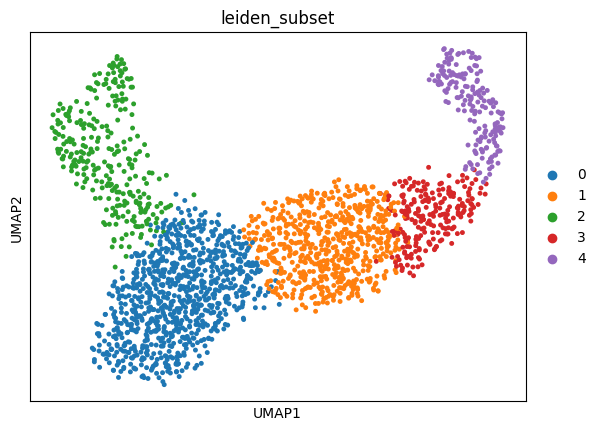

In [4]:
cdata = cdata[cell_ids_3].copy()

sc.pp.highly_variable_genes(cdata, n_top_genes=2000, flavor="seurat_v3")

sc.pp.normalize_total(cdata)
sc.pp.log1p(cdata)
sc.pp.scale(cdata, max_value=10)

sc.tl.pca(cdata, use_highly_variable=True)
sc.pp.neighbors(cdata, n_neighbors=10, n_pcs=30)
sc.tl.umap(cdata)

# custom umap for subset of cells
cdata.obsm['X_umap_subset'] = cdata.obsm['X_umap'].copy()

sc.tl.leiden(cdata, resolution=0.8, key_added='leiden_subset')
sc.pl.umap(cdata, color=['leiden_subset'], size=50)

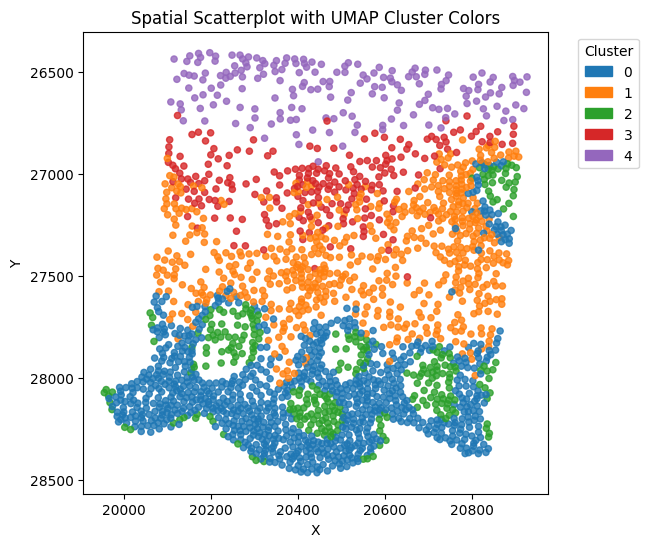

In [5]:
coords = cdata.obsm['spatial']
clusters = cdata.obs['leiden_subset'].astype(str)

cluster_colors = cdata.uns['leiden_subset_colors']
cluster_order = cdata.obs['leiden_subset'].cat.categories

color_map = dict(zip(cluster_order, cluster_colors))
cell_colors = clusters.map(color_map)

plt.figure(figsize=(6,6))

plt.scatter(coords[:,0], coords[:,1], c=cell_colors, s=20, alpha=0.8)

# legend
patches = [mpatches.Patch(color=color_map[cluster], label=cluster) for cluster in cluster_order]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left', title='Cluster')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Spatial Scatterplot with UMAP Cluster Colors')
plt.gca().invert_yaxis()
plt.show()


In [6]:
SKIN_GENE_SIGNATURES = {
    # Epidermis-related genes
    "Epidermis": [
        "KRT5",
        "KRT14",
        "KRT15",
        "KRT19",  # Basal layer keratin
        "TP63",
        "TP73",  # Epidermal stem cell transcription factor
        "ITGA6",
        "ITGB4",  # Epidermal stem cell marker
        "COL17A1",
        "LAMA5",  # Basement membrane component
    ],
    # Dermis-related genes
    "Dermis": [
        "COL1A1",
        "COL1A2",
        "COL3A1",  # Collagen
        "VIM",
        "ACTA2",  # Fibroblast marker
        "PDGFRA",
        "PDGFRB",  # Fibroblast receptor
        "ELN",
        "FBN1",  # Elastic fiber
    ],
    # Hair follicle-related genes
    "Hair_Follicle": [
        "LGR5",
        "LGALS7",  # Hair follicle stem cells
        "SOX9",
        "NFATC1",  # Hair follicle development
        "BMP2",
        "BMP4",  # Hair follicle morphogenesis
        "WNT3",
        "WNT10A",  # Wnt signaling pathway
    ],
    # Sebaceous gland-related genes
    "Sebaceous": [
        "BLIMP1",
        "CEBPA",  # Sebaceous gland differentiation
        "PPARG",
        "SREBF1",  # Lipid metabolism
        "FASN",
        "SCD",  # Fatty acid synthesis
    ],
    # Immune/inflammation-related genes
    "Immune": [
        "CD68",
        "CD163",  # Macrophages
        "CD3E",
        "CD8A",  # T cells
        "IL1B",
        "TNF",  # Inflammatory factors
        "PTPRC",  # Common leukocyte antigen
    ],
    # Vascular-related genes
    "Vascular": [
        "PECAM1",
        "CDH5",  # Endothelial cells
        "ACTA2",
        "TAGLN",  # Smooth muscle cells
        "VEGFA",
        "ANGPT1",  # Angiogenesis
    ],
}


def intelligent_slingshot_analysis(
    adata,
    gene_signatures=None,
    cluster_key="leiden",
    embedding_key="X_umap",
    expected_trajectories=None,
    min_cluster_size=10,
    plot_analysis=True,
    auto_infer_trajectories=True,
):
    """
    基于基因表达的智能Slingshot轨迹分析

    Parameters:
    -----------
    adata : AnnData
        single-cell data
    gene_signatures : dict
        gene signature dictionary, if None, use the default SKIN_GENE_SIGNATURES
    cluster_key : str
        clustering information key
    embedding_key : str
        embedding coordinates key
    expected_trajectories : list, optional
        expected trajectory directions, e.g. [('Hair_Follicle', 'Epidermis'), ('Epidermis', 'Dermis')]
        If None and auto_infer_trajectories=True, will infer automatically
    min_cluster_size : int
        minimum cluster size threshold
    plot_analysis : bool
        whether to plot analysis results
    auto_infer_trajectories : bool
        whether to automatically infer trajectory directions (based on gene expression)

    Returns:
    --------
    dict : containing analysis results and adjusted adata
    """

    if gene_signatures is None:
        gene_signatures = SKIN_GENE_SIGNATURES

    print("=====Starting Intelligent Slingshot Analysis=====")
    print("=" * 80)

    # 1. Analyzing gene expression patterns
    print("1. Analyzing gene expression patterns...")
    gene_analysis = analyze_cluster_gene_signatures(
        adata, gene_signatures, cluster_key, min_cluster_size
    )

    if not gene_analysis["valid_clusters"]:
        print("No enough valid clusters found.")
        return None

    # 2. Determining the best trajectory starting points
    print("2. Determining the best trajectory starting points...")

    # If auto-inference is needed and no expected trajectories are provided
    if auto_infer_trajectories and expected_trajectories is None:
        print(
            " Automatically inferring trajectory directions based on gene expression..."
        )
        inferred_trajectories = auto_infer_developmental_trajectories(
            adata, gene_analysis, cluster_key, embedding_key
        )
        expected_trajectories = inferred_trajectories["trajectories"]

        print(f"There are {len(expected_trajectories)} potential trajectories:")
        for i, (start, end) in enumerate(expected_trajectories):
            print(f"Trajectory {i+1}: {start} → {end}")

    trajectory_plan = determine_trajectory_starting_points(
        adata, gene_analysis, expected_trajectories, cluster_key
    )

    # 3. Running optimized Slingshot analysis
    print("3. Running optimized Slingshot analysis")
    optimized_results = {}

    for i, start_info in enumerate(trajectory_plan["starting_points"]):
        start_cluster = start_info["cluster_id"]
        rationale = start_info["rationale"]

        print(f"Trajectory {i+1}: Starting Cluster {start_cluster}")
        print(f"Rationale: {rationale}")

        # Run Slingshot
        adata_result = run_slingshot_via_rpy2_improved(
            adata.copy(),
            cluster_key=cluster_key,
            embedding_key=embedding_key,
            start_cluster=str(start_cluster),
        )

        if adata_result is not None:
            optimized_results[f"start_cluster_{start_cluster}"] = adata_result

    # If no optimized results found, run default analysis (No specified starting points)
    if not optimized_results:
        print("Running default Slingshot analysis...(No specified starting points)")
        default_result = run_slingshot_via_rpy2_improved(
            adata.copy(), cluster_key=cluster_key, embedding_key=embedding_key
        )
        if default_result is not None:
            optimized_results["default"] = default_result

    # 4. Evaluating and selecting the best trajectory result
    print("4. Evaluating and selecting the best trajectory result")
    best_result = select_best_trajectory_result(
        optimized_results, gene_signatures, cluster_key
    )

    if best_result is None:
        print("No valid trajectory result found.")
        return None

    # 5. Validating and visualizing
    print("5. Validating trajectory biological significance")
    validation_results = validate_trajectory_biology(
        best_result["adata"], gene_signatures, cluster_key
    )

    # Plotting the comprehensive analysis results
    if plot_analysis:
        plot_intelligent_analysis_summary(
            best_result["adata"],
            gene_analysis,
            validation_results,
            cluster_key,
            embedding_key,
        )

    return {
        "final_adata": best_result["adata"],
        "gene_analysis": gene_analysis,
        "trajectory_plan": trajectory_plan,
        "all_results": optimized_results,
        "best_result_info": best_result,
        "validation": validation_results,
    }


def analyze_cluster_gene_signatures(
    adata, gene_signatures, cluster_key, min_cluster_size
):
    """Analyzing cluster gene signatures"""

    print("Calculating cluster gene signature scores...")

    cluster_gene_scores = {}
    cluster_info = {}

    for cluster_id in adata.obs[cluster_key].unique():
        if pd.isna(cluster_id):
            continue

        cluster_mask = adata.obs[cluster_key] == cluster_id
        cluster_size = cluster_mask.sum()

        if cluster_size < min_cluster_size:
            print(f"Skipping cluster {cluster_id} due to insufficient cell count.")
            continue

        cluster_cells = adata[cluster_mask]
        cluster_scores = {}

        # Calculating gene signature scores
        for cell_type, genes in gene_signatures.items():
            available_genes = [g for g in genes if g in adata.var_names]
            if len(available_genes) == 0:
                cluster_scores[cell_type] = 0
                continue

            if hasattr(cluster_cells.X, "toarray"):
                gene_expr = cluster_cells[:, available_genes].X.toarray()
            else:
                gene_expr = cluster_cells[:, available_genes].X

            # Using mean expression as signature score
            signature_score = np.mean(gene_expr)
            cluster_scores[cell_type] = signature_score

        cluster_gene_scores[cluster_id] = cluster_scores
        cluster_info[cluster_id] = {
            "size": cluster_size,
            "dominant_signature": max(cluster_scores, key=cluster_scores.get),
            "max_score": max(cluster_scores.values()),
            "scores": cluster_scores,
        }

        # Output cluster features
        dominant = cluster_info[cluster_id]["dominant_signature"]
        max_score = cluster_info[cluster_id]["max_score"]
        print(
            f"Cluster {cluster_id:2}: {cluster_size:3} cells | Dominant Feature: {dominant:12} (Score: {max_score:.3f})"
        )

    return {
        "cluster_scores": cluster_gene_scores,
        "cluster_info": cluster_info,
        "valid_clusters": list(cluster_info.keys()),
    }


def auto_infer_developmental_trajectories(
    adata, gene_analysis, cluster_key, embedding_key
):
    """
    Automatically inferring developmental trajectories based on gene expression and spatial proximity
    """

    cluster_info = gene_analysis["cluster_info"]
    cluster_scores = gene_analysis["cluster_scores"]

    print("Analyzing cluster cell type primitiveness and differentiation potential...")

    # 1. Calculating cell type primitiveness scores
    primitiveness_scores = calculate_cluster_primitiveness(cluster_info)

    # 2. Calculating transcriptional similarity between clusters
    transcriptional_distances = calculate_cluster_transcriptional_distances(
        adata, cluster_key, list(cluster_info.keys())
    )

    # 3. Calculating spatial adjacency (based on UMAP)
    spatial_adjacency = calculate_cluster_spatial_adjacency(
        adata, cluster_key, embedding_key, list(cluster_info.keys())
    )

    # 4. Inferring potential trajectories
    potential_trajectories = infer_trajectories_from_analysis(
        cluster_info, primitiveness_scores, transcriptional_distances, spatial_adjacency
    )

    return {
        "trajectories": potential_trajectories,
        "primitiveness_scores": primitiveness_scores,
        "transcriptional_distances": transcriptional_distances,
        "spatial_adjacency": spatial_adjacency,
        "analysis_details": {
            "method": "gene_expression_based",
            "n_trajectories": len(potential_trajectories),
        },
    }


def calculate_cluster_primitiveness(cluster_info):
    """Calculating the primitiveness scores for each cluster"""

    # Defining the developmental hierarchy of cell types
    developmental_hierarchy = {
        "Hair_Follicle": 1.0,  # Hair follicle stem cells - most primitive
        "Sebaceous": 0.8,  # Sebaceous gland progenitors
        "Epidermis": 0.6,  # Epidermal cells
        "Dermis": 0.4,  # Dermal fibroblasts
        "Vascular": 0.2,  # Vascular cells
        "Immune": 0.1,  # Immune cells - most differentiated
    }

    primitiveness_scores = {}

    for cluster_id, info in cluster_info.items():
        dominant_type = info["dominant_signature"]
        base_score = developmental_hierarchy.get(dominant_type, 0.5)

        signature_strength = info["max_score"]

        # Original Score: Primitiveness Score = Base Developmental Level * Gene Signature Strength
        primitiveness_score = base_score * min(signature_strength, 1.0)

        primitiveness_scores[cluster_id] = {
            "score": primitiveness_score,
            "cell_type": dominant_type,
            "signature_strength": signature_strength,
        }

        print(
            f"Cluster {cluster_id}: {dominant_type:12} | Primitiveness: {primitiveness_score:.3f}"
        )

    return primitiveness_scores


def calculate_cluster_transcriptional_distances(adata, cluster_key, valid_clusters):
    """
    Calculating the transcriptional distances between clusters
    """

    print("   📊 Calculating transcriptional similarity between clusters...")

    # Calculating the average gene expression for each cluster
    cluster_profiles = {}

    for cluster_id in valid_clusters:
        cluster_mask = adata.obs[cluster_key] == cluster_id
        cluster_cells = adata[cluster_mask]

        if hasattr(cluster_cells.X, "toarray"):
            cluster_expr = np.mean(cluster_cells.X.toarray(), axis=0)
        else:
            cluster_expr = np.mean(cluster_cells.X, axis=0)

        cluster_profiles[cluster_id] = cluster_expr

    # Calculating the distance matrix
    cluster_ids = list(cluster_profiles.keys())
    n_clusters = len(cluster_ids)
    distance_matrix = np.zeros((n_clusters, n_clusters))

    for i, cluster1 in enumerate(cluster_ids):
        for j, cluster2 in enumerate(cluster_ids):
            if i != j:
                # Using Pearson correlation coefficient distance
                correlation = np.corrcoef(
                    cluster_profiles[cluster1], cluster_profiles[cluster2]
                )[0, 1]
                distance = 1 - abs(correlation)  # Distance = 1 - |Correlation|
                distance_matrix[i, j] = distance

    # Converting to dictionary format
    distance_dict = {}
    for i, cluster1 in enumerate(cluster_ids):
        distance_dict[cluster1] = {}
        for j, cluster2 in enumerate(cluster_ids):
            distance_dict[cluster1][cluster2] = distance_matrix[i, j]

    return distance_dict


def calculate_cluster_spatial_adjacency(
    adata, cluster_key, embedding_key, valid_clusters
):
    """Calculating the spatial adjacency of clusters"""

    print("   🗺️  Calculating spatial adjacency...")
    if embedding_key not in adata.obsm:
        print(
            "      Warning: Embedding coordinates not found, skipping spatial analysis"
        )
        return {}

    # Calculating the center point for each cluster
    cluster_centers = {}
    embedding = adata.obsm[embedding_key]

    for cluster_id in valid_clusters:
        cluster_mask = adata.obs[cluster_key] == cluster_id
        cluster_coords = embedding[cluster_mask]
        center = np.mean(cluster_coords, axis=0)
        cluster_centers[cluster_id] = center

    # Calculate the distance between cluster centers
    adjacency_dict = {}
    cluster_ids = list(cluster_centers.keys())

    for cluster1 in cluster_ids:
        adjacency_dict[cluster1] = {}
        center1 = cluster_centers[cluster1]

        for cluster2 in cluster_ids:
            if cluster1 != cluster2:
                center2 = cluster_centers[cluster2]
                distance = np.linalg.norm(center1 - center2)
                # Convert distance to adjacency (smaller distance means higher adjacency)
                adjacency = 1.0 / (1.0 + distance)
                adjacency_dict[cluster1][cluster2] = adjacency
            else:
                adjacency_dict[cluster1][cluster2] = 1.0

    return adjacency_dict


def infer_trajectories_from_analysis(
    cluster_info, primitiveness_scores, transcriptional_distances, spatial_adjacency
):
    """
    Based on multi-omics analysis to infer developmental trajectories
    """

    print("Integrating analysis results to infer trajectories...")

    trajectories = []
    cluster_ids = list(cluster_info.keys())

    # Sort clusters by primitiveness
    sorted_clusters = sorted(
        cluster_ids, key=lambda x: primitiveness_scores[x]["score"], reverse=True
    )

    # Strategy 1: Start from the most primitive clusters and look for potential differentiation paths
    for i, start_cluster in enumerate(
        sorted_clusters[:3]
    ):  # Consider the top 3 most primitive clusters
        start_type = cluster_info[start_cluster]["dominant_signature"]
        start_primitiveness = primitiveness_scores[start_cluster]["score"]

        # Find potential end clusters
        potential_ends = []

        for end_cluster in cluster_ids:
            if end_cluster == start_cluster:
                continue

            end_type = cluster_info[end_cluster]["dominant_signature"]
            end_primitiveness = primitiveness_scores[end_cluster]["score"]

            # Condition 1: The end cluster should be more differentiated than the start cluster (lower primitiveness)
            if end_primitiveness >= start_primitiveness:
                continue

            # Condition 2: Check biological plausibility
            if not is_biologically_plausible_transition(start_type, end_type):
                continue

            # Condition 3: Calculate overall connection strength
            transcriptional_similarity = 1 - transcriptional_distances.get(
                start_cluster, {}
            ).get(end_cluster, 1.0)
            spatial_proximity = spatial_adjacency.get(start_cluster, {}).get(
                end_cluster, 0.0
            )
            primitiveness_gradient = start_primitiveness - end_primitiveness

            connection_score = (
                transcriptional_similarity * 0.4
                + spatial_proximity * 0.3
                + primitiveness_gradient * 0.3
            )

            potential_ends.append(
                {"cluster": end_cluster, "type": end_type, "score": connection_score}
            )

        # Select the best end cluster
        if potential_ends:
            potential_ends.sort(key=lambda x: x["score"], reverse=True)
            best_end = potential_ends[0]

            if best_end["score"] > 0.2:
                trajectories.append((start_type, best_end["type"]))
                print(
                    f"      Found trajectory: {start_type} → {best_end['type']} (Score: {best_end['score']:.3f})"
                )

    # Remove duplicates and limit the number
    trajectories = list(set(trajectories))[:3]  # At most 3 trajectories

    if not trajectories:
        print("      ⚠️  No clear trajectories found, using default strategy")
        # Backup strategy: Select the most primitive and most differentiated cell types
        if len(sorted_clusters) >= 2:
            start_type = cluster_info[sorted_clusters[0]]["dominant_signature"]
            end_type = cluster_info[sorted_clusters[-1]]["dominant_signature"]
            trajectories = [(start_type, end_type)]

    return trajectories


def is_biologically_plausible_transition(start_type, end_type):
    """Check if the transition between two cell types is biologically plausible"""

    # Define known biological transition relationships
    plausible_transitions = {
        "Hair_Follicle": ["Epidermis", "Sebaceous"],
        "Sebaceous": ["Epidermis"],
        "Epidermis": ["Dermis"],
        "Dermis": ["Vascular"],
        "Vascular": [],
        "Immune": [],  # Immune cells are usually not precursors to other cell types
    }

    # Check if the transition is in the known list
    allowed_targets = plausible_transitions.get(start_type, [])
    return (
        end_type in allowed_targets or len(allowed_targets) == 0
    )  # If not defined, allow transition


def determine_trajectory_starting_points(
    adata, gene_analysis, expected_trajectories, cluster_key
):
    """Determine trajectory starting points"""

    cluster_info = gene_analysis["cluster_info"]

    # Define the primitiveness hierarchy of cell types (lower values are more primitive)
    primitiveness_hierarchy = {
        "Hair_Follicle": 1,  # Hair follicle stem cells are the most primitive
        "Sebaceous": 2,  # Sebaceous stem cells
        "Epidermis": 3,  # Epidermal cells
        "Dermis": 4,  # Dermal fibroblasts
        "Vascular": 5,  # Vascular cells
        "Immune": 6,  # Immune cells (usually not developmental starting points)
    }

    starting_points = []

    # Strategy 1: If there are expected trajectories, use the expected starting points
    if expected_trajectories:
        print("Determine starting points based on expected trajectories:")
        for start_type, end_type in expected_trajectories:
            # Find the cluster that best matches the starting type
            best_cluster = None
            best_score = -1

            for cluster_id, info in cluster_info.items():
                if info["dominant_signature"] == start_type:
                    score = info["scores"][start_type]
                    if score > best_score:
                        best_score = score
                        best_cluster = cluster_id

            if best_cluster is not None:
                starting_points.append(
                    {
                        "cluster_id": best_cluster,
                        "rationale": f"Expected starting point for {start_type}→{end_type}",
                        "confidence": "high",
                    }
                )
                print(f"{start_type}→{end_type}: Choosing cluster {best_cluster}")

    # Strategy 2: Automatically select starting points based on primitiveness
    if not starting_points:
        print("Automatically selecting starting points based on cell primitiveness:")

        # Sort clusters by primitiveness
        cluster_primitiveness = []
        for cluster_id, info in cluster_info.items():
            dominant_type = info["dominant_signature"]
            primitiveness_score = primitiveness_hierarchy.get(dominant_type, 10)

            cluster_primitiveness.append(
                {
                    "cluster_id": cluster_id,
                    "type": dominant_type,
                    "primitiveness": primitiveness_score,
                    "expression_score": info["max_score"],
                    "size": info["size"],
                }
            )

        # Sort by: primitiveness > expression score > cluster size
        cluster_primitiveness.sort(
            key=lambda x: (x["primitiveness"], -x["expression_score"], -x["size"])
        )

        # Select the most primitive 1-2 clusters as starting points
        for i, cluster_data in enumerate(cluster_primitiveness[:2]):
            starting_points.append(
                {
                    "cluster_id": cluster_data["cluster_id"],
                    "rationale": f"The most primitive cell type ({cluster_data['type']}, primitiveness: {cluster_data['primitiveness']})",
                    "confidence": "medium" if i == 0 else "low",
                }
            )
            print(f"Choosing {cluster_data['cluster_id']}: {cluster_data['type']}")

    # Strategy 3: If all else fails, select the largest cluster
    if not starting_points:
        print("Backup strategy: Select the largest cluster")
        largest_cluster = max(
            cluster_info.keys(), key=lambda x: cluster_info[x]["size"]
        )
        starting_points.append(
            {
                "cluster_id": largest_cluster,
                "rationale": f"max size {cluster_info[largest_cluster]['size']}",
                "confidence": "low",
            }
        )
        print(f"Choose Cluster {largest_cluster}")

    return {
        "starting_points": starting_points,
        "primitiveness_hierarchy": primitiveness_hierarchy,
        "strategy_used": "expected" if expected_trajectories else "automatic",
    }


def select_best_trajectory_result(results_dict, gene_signatures, cluster_key):
    """Choose the best trajectory from multiple results"""

    if not results_dict:
        return None

    print("Evaluating the quality of each trajectory result:")

    result_scores = {}

    for result_name, adata_result in results_dict.items():
        # Get pseudotime columns
        pt_cols = [
            col
            for col in adata_result.obs.columns
            if col.startswith("slingshot_pseudotime")
        ]

        if not pt_cols:
            continue

        total_score = 0
        trajectory_count = len(pt_cols)

        for pt_col in pt_cols:
            # Calculate the quality score for this trajectory
            valid_mask = ~np.isnan(adata_result.obs[pt_col])
            if valid_mask.sum() < 10:
                continue

            # Calculate gene expression correlation score
            correlation_score = calculate_trajectory_gene_correlation_score(
                adata_result, pt_col, gene_signatures
            )

            # Calculate cell count-based score
            coverage_score = valid_mask.sum() / len(adata_result)

            # Combine scores
            trajectory_score = correlation_score * 0.7 + coverage_score * 0.3
            total_score += trajectory_score

        avg_score = total_score / trajectory_count if trajectory_count > 0 else 0
        result_scores[result_name] = {
            "score": avg_score,
            "trajectory_count": trajectory_count,
            "adata": adata_result,
        }

        print(f"{result_name}: Score {avg_score:.3f} ({trajectory_count} trajectories)")

    # Select the best result
    if result_scores:
        best_name = max(result_scores, key=lambda x: result_scores[x]["score"])
        best_result = result_scores[best_name]
        print(f"Best result: {best_name} (Score: {best_result['score']:.3f})")
        return {
            "name": best_name,
            "adata": best_result["adata"],
            "score": best_result["score"],
        }

    return None


def calculate_trajectory_gene_correlation_score(adata, pt_col, gene_signatures):
    """Calculate the correlation score between trajectory and gene expression"""

    valid_mask = ~np.isnan(adata.obs[pt_col])
    if valid_mask.sum() < 10:
        return 0

    valid_adata = adata[valid_mask]
    pseudotime = valid_adata.obs[pt_col].values

    correlation_scores = []

    for cell_type, genes in gene_signatures.items():
        available_genes = [g for g in genes if g in adata.var_names]
        if len(available_genes) == 0:
            continue

        # Calculate gene signature score
        if hasattr(valid_adata.X, "toarray"):
            gene_expr = valid_adata[:, available_genes].X.toarray()
        else:
            gene_expr = valid_adata[:, available_genes].X

        signature_score = np.mean(gene_expr, axis=1)

        # Calculate correlation
        correlation, p_value = spearmanr(pseudotime, signature_score)

        if p_value < 0.05:
            correlation_scores.append(abs(correlation))

    return np.mean(correlation_scores) if correlation_scores else 0


def validate_trajectory_biology(adata, gene_signatures, cluster_key):
    """Verify the biological relevance of trajectories"""

    pt_cols = [
        col for col in adata.obs.columns if col.startswith("slingshot_pseudotime")
    ]

    validation_results = {}

    for pt_col in pt_cols:
        traj_name = pt_col.replace("slingshot_pseudotime_", "Trajectory_")

        valid_mask = ~np.isnan(adata.obs[pt_col])
        if valid_mask.sum() < 10:
            continue

        # Analysis the trajectory direction
        correlations = {}
        for cell_type, genes in gene_signatures.items():
            available_genes = [g for g in genes if g in adata.var_names]
            if len(available_genes) == 0:
                continue

            valid_adata = adata[valid_mask]
            pseudotime = valid_adata.obs[pt_col].values

            if hasattr(valid_adata.X, "toarray"):
                gene_expr = valid_adata[:, available_genes].X.toarray()
            else:
                gene_expr = valid_adata[:, available_genes].X

            signature_score = np.mean(gene_expr, axis=1)
            correlation, p_value = spearmanr(pseudotime, signature_score)

            correlations[cell_type] = {
                "correlation": correlation,
                "p_value": p_value,
                "significant": p_value < 0.05,
            }

        # Infer trajectory direction
        start_features = [
            ct
            for ct, data in correlations.items()
            if data["correlation"] < -0.3 and data["significant"]
        ]
        end_features = [
            ct
            for ct, data in correlations.items()
            if data["correlation"] > 0.3 and data["significant"]
        ]

        validation_results[traj_name] = {
            "correlations": correlations,
            "inferred_start": start_features,
            "inferred_end": end_features,
            "direction": (
                f"{start_features} → {end_features}"
                if start_features and end_features
                else "N/A"
            ),
            "valid_cells": valid_mask.sum(),
        }

        print(
            f"{traj_name}: {validation_results[traj_name]['direction']} ({valid_mask.sum()} cells)"
        )

    return validation_results


def plot_intelligent_analysis_summary(adata, gene_analysis, validation_results, cluster_key, embedding_key):
    """Plotting intelligent analysis results summary"""

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))

    # 1. Cluster gene signature heatmap
    cluster_scores = gene_analysis["cluster_scores"]
    if cluster_scores:
        score_matrix = pd.DataFrame(cluster_scores).T
        sns.heatmap(score_matrix, annot=True, cmap="viridis", ax=axes[0, 0])
        axes[0, 0].set_title("Cluster Gene Signature Scores")
        axes[0, 0].set_xlabel("Clusters")
        axes[0, 0].set_ylabel("Cell Types")

    # 2. UMAP with clusters
    if embedding_key in adata.obsm:
        umap_coords = adata.obsm[embedding_key]
        scatter = axes[0, 1].scatter(
            umap_coords[:, 0],
            umap_coords[:, 1],
            c=adata.obs[cluster_key].astype("category").cat.codes,
            cmap="tab20",
            s=1,
            alpha=0.6,
        )
        axes[0, 1].set_title("Clusters in UMAP Space")
        axes[0, 1].set_xlabel("UMAP 1")
        axes[0, 1].set_ylabel("UMAP 2")

        # Add cluster labels
        for cluster_id in adata.obs[cluster_key].unique():
            if pd.isna(cluster_id):
                continue
            cluster_mask = adata.obs[cluster_key] == cluster_id
            cluster_center = np.mean(umap_coords[cluster_mask], axis=0)
            axes[0, 1].annotate(
                str(cluster_id),
                cluster_center,
                fontsize=10,
                ha="center",
                va="center",
                fontweight="bold",
            )

    # 3. Trajectory pseudotime distribution
    pt_cols = [
        col for col in adata.obs.columns if col.startswith("slingshot_pseudotime")
    ]
    if pt_cols:
        for i, pt_col in enumerate(pt_cols[:2]):  # Show at most 2 trajectories
            valid_mask = ~np.isnan(adata.obs[pt_col])
            if valid_mask.sum() > 0:
                axes[0, 2].hist(
                    adata.obs.loc[valid_mask, pt_col],
                    alpha=0.6,
                    bins=30,
                    label=f"Trajectory {i+1}",
                )
        axes[0, 2].set_title("Pseudotime Distribution")
        axes[0, 2].set_xlabel("Pseudotime")
        axes[0, 2].set_ylabel("Cell Count")
        axes[0, 2].legend()

    # 4-6. Trajectory correlation analysis
    for i, (traj_name, validation) in enumerate(list(validation_results.items())[:3]):
        if i >= 3:
            break

        correlations = validation["correlations"]
        cell_types = list(correlations.keys())
        corr_values = [correlations[ct]["correlation"] for ct in cell_types]
        p_values = [correlations[ct]["p_value"] for ct in cell_types]

        # Color coding for significance
        colors = ["red" if p < 0.05 else "gray" for p in p_values]

        ax_idx = (1, i) if i < 3 else (1, 2)
        axes[ax_idx].barh(cell_types, corr_values, color=colors)
        axes[ax_idx].set_title(f"{traj_name} Gene Correlations")
        axes[ax_idx].set_xlabel("Correlation with Pseudotime")
        axes[ax_idx].axvline(x=0, color="black", linestyle="-", alpha=0.3)
        axes[ax_idx].axvline(x=0.3, color="blue", linestyle="--", alpha=0.5)
        axes[ax_idx].axvline(x=-0.3, color="blue", linestyle="--", alpha=0.5)

    plt.tight_layout()
    plt.suptitle("Intelligent Slingshot Analysis Summary", y=1.02, fontsize=16)
    plt.show()


# Improved Slingshot Function
def run_slingshot_via_rpy2_improved(
    adata,
    cluster_key="leiden",
    embedding_key="X_umap",
    start_cluster=None,
    end_clusters=None,
):
    try:
        from rpy2 import robjects as ro
        from rpy2.robjects.packages import importr
        import tempfile
        from scipy import sparse

        # Import R
        base = importr("base")
        utils = importr("utils")

        # Creating temporary
        with tempfile.TemporaryDirectory() as temp_dir:
            print("Creating temporary files...")

            # Export to CSV file
            if sparse.issparse(adata.X):
                expr_df = pd.DataFrame(adata.X.toarray())
            else:
                expr_df = pd.DataFrame(adata.X)

            umap_df = pd.DataFrame(
                adata.obsm[embedding_key], columns=["UMAP1", "UMAP2"]
            )
            clusters_df = pd.DataFrame({"clusters": adata.obs[cluster_key].astype(str)})

            expr_file = os.path.join(temp_dir, "expr.csv")
            umap_file = os.path.join(temp_dir, "umap.csv")
            clusters_file = os.path.join(temp_dir, "clusters.csv")

            expr_df.to_csv(expr_file, index=False)
            umap_df.to_csv(umap_file, index=False)
            clusters_df.to_csv(clusters_file, index=False)

            print("Reading data and running analysis in R...")

            # Build R command
            r_cmd = f"""
            # Import and load packages
            if (!requireNamespace("BiocManager", quietly = TRUE))
                install.packages("BiocManager")
            
            required_packages <- c("slingshot", "SingleCellExperiment")
            for (pkg in required_packages) {{
                if (!requireNamespace(pkg, quietly = TRUE)) {{
                    BiocManager::install(pkg)
                }}
            }}
            
            library(slingshot)
            library(SingleCellExperiment)
            
            # Load data
            expr_matrix <- as.matrix(read.csv("{expr_file}"))
            umap_coords <- as.matrix(read.csv("{umap_file}"))
            clusters <- read.csv("{clusters_file}")$clusters
            
            # Transpose gene expression matrix (gene x cell)
            expr_matrix <- t(expr_matrix)

            # Create SingleCellExperiment object
            sce <- SingleCellExperiment(
                assays = list(counts = expr_matrix)
            )
            
            # Add UMAP and cluster info
            reducedDims(sce) <- list(UMAP = umap_coords)
            colData(sce)$clusters <- clusters
            
            # Run Slingshot
            """

            # Start and End cluster parameters (Optional)
            if start_cluster is not None:
                r_cmd += f'start_clus <- "{start_cluster}"\n'
                r_cmd += 'sce <- slingshot(sce, clusterLabels = "clusters", reducedDim = "UMAP", start.clus = start_clus)\n'
            else:
                r_cmd += 'sce <- slingshot(sce, clusterLabels = "clusters", reducedDim = "UMAP")\n'

            r_cmd += f"""

            # Get result
            pseudotimes <- slingPseudotime(sce)
            weights <- slingCurveWeights(sce)

            write.csv(pseudotimes, "{temp_dir}/pseudotimes.csv")
            write.csv(weights, "{temp_dir}/weights.csv")
            
            # Return number of trajectories
            n_lineages <- ncol(pseudotimes)
            cat("Found", n_lineages, "trajectories\\n")
            """

            # Execute R
            ro.r(r_cmd)

            print("Reading results...")

            pseudotimes_file = os.path.join(temp_dir, "pseudotimes.csv")
            weights_file = os.path.join(temp_dir, "weights.csv")

            if os.path.exists(pseudotimes_file):
                pseudotimes_df = pd.read_csv(pseudotimes_file, index_col=0)
                weights_df = pd.read_csv(weights_file, index_col=0)

                # Add to adata
                for i, col in enumerate(pseudotimes_df.columns):
                    adata.obs[f"slingshot_pseudotime_{i+1}"] = pseudotimes_df.iloc[
                        :, i
                    ].values

                for i, col in enumerate(weights_df.columns):
                    adata.obs[f"slingshot_weight_{i+1}"] = weights_df.iloc[:, i].values

                print(
                    f"Slingshot analysis completed! Found {len(pseudotimes_df.columns)} trajectories"
                )
                return adata
            else:
                print("Could not find result files")
                return None

    except ImportError:
        print("Error: Please install rpy2 package")
        print("Run: pip install rpy2")
        print("And install Slingshot in R: BiocManager::install('slingshot')")
        return None
    except Exception as e:
        print(f"Error running Slingshot: {e}")
        return None


def smart_slingshot_skin_analysis(adata, expected_trajectories=None, auto_infer=True, **kwargs):
    # If automatic inference is enabled and no expected trajectories are provided, set to None for automatic analysis
    if auto_infer and expected_trajectories is None:
        print("Automatic trajectory inference enabled.")
        expected_trajectories = None
    elif not auto_infer and expected_trajectories is None:
        expected_trajectories = [
            ("Hair_Follicle", "Epidermis"),
            ("Epidermis", "Dermis"),
            ("Sebaceous", "Epidermis"),
        ]
        print("Default trajectories set.")

    return intelligent_slingshot_analysis(
        adata,
        gene_signatures=SKIN_GENE_SIGNATURES,
        expected_trajectories=expected_trajectories,
        auto_infer_trajectories=auto_infer,
        **kwargs,
    )

Automatic trajectory inference enabled.
=====Starting Intelligent Slingshot Analysis=====
1. Analyzing gene expression patterns...
Calculating cluster gene signature scores...
Cluster 12:  95 cells | Dominant Feature: Immune       (Score: 0.110)
Cluster 0 : 1048 cells | Dominant Feature: Epidermis    (Score: 0.192)
Cluster 4 : 715 cells | Dominant Feature: Sebaceous    (Score: 0.027)
Cluster 7 : 115 cells | Dominant Feature: Dermis       (Score: 1.358)
Cluster 5 :  60 cells | Dominant Feature: Dermis       (Score: 1.280)
Cluster 8 :  97 cells | Dominant Feature: Vascular     (Score: 0.220)
Cluster 13:  17 cells | Dominant Feature: Dermis       (Score: 0.789)
Skipping cluster 14 due to insufficient cell count.
Skipping cluster 1 due to insufficient cell count.
Cluster 9 :  18 cells | Dominant Feature: Vascular     (Score: -0.011)
Skipping cluster 6 due to insufficient cell count.
2. Determining the best trajectory starting points...
 Automatically inferring trajectory directions based o

R callback write-console: Loading required package: princurve
  
R callback write-console: Loading required package: TrajectoryUtils
  
R callback write-console: Loading required package: SingleCellExperiment
  
R callback write-console: Loading required package: SummarizedExperiment
  
R callback write-console: Loading required package: MatrixGenerics
  
R callback write-console: Loading required package: matrixStats
  
R callback write-console: 
Attaching package: ‘MatrixGenerics’

  
R callback write-console: The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, c

Found 3 trajectories
Reading results...
Slingshot analysis completed! Found 3 trajectories
4. Evaluating and selecting the best trajectory result
Evaluating the quality of each trajectory result:
start_cluster_7: Score 0.359 (3 trajectories)
Best result: start_cluster_7 (Score: 0.359)
5. Validating trajectory biological significance
Trajectory_1: N/A (2118 cells)
Trajectory_2: N/A (529 cells)
Trajectory_3: ['Epidermis'] → ['Vascular'] (196 cells)


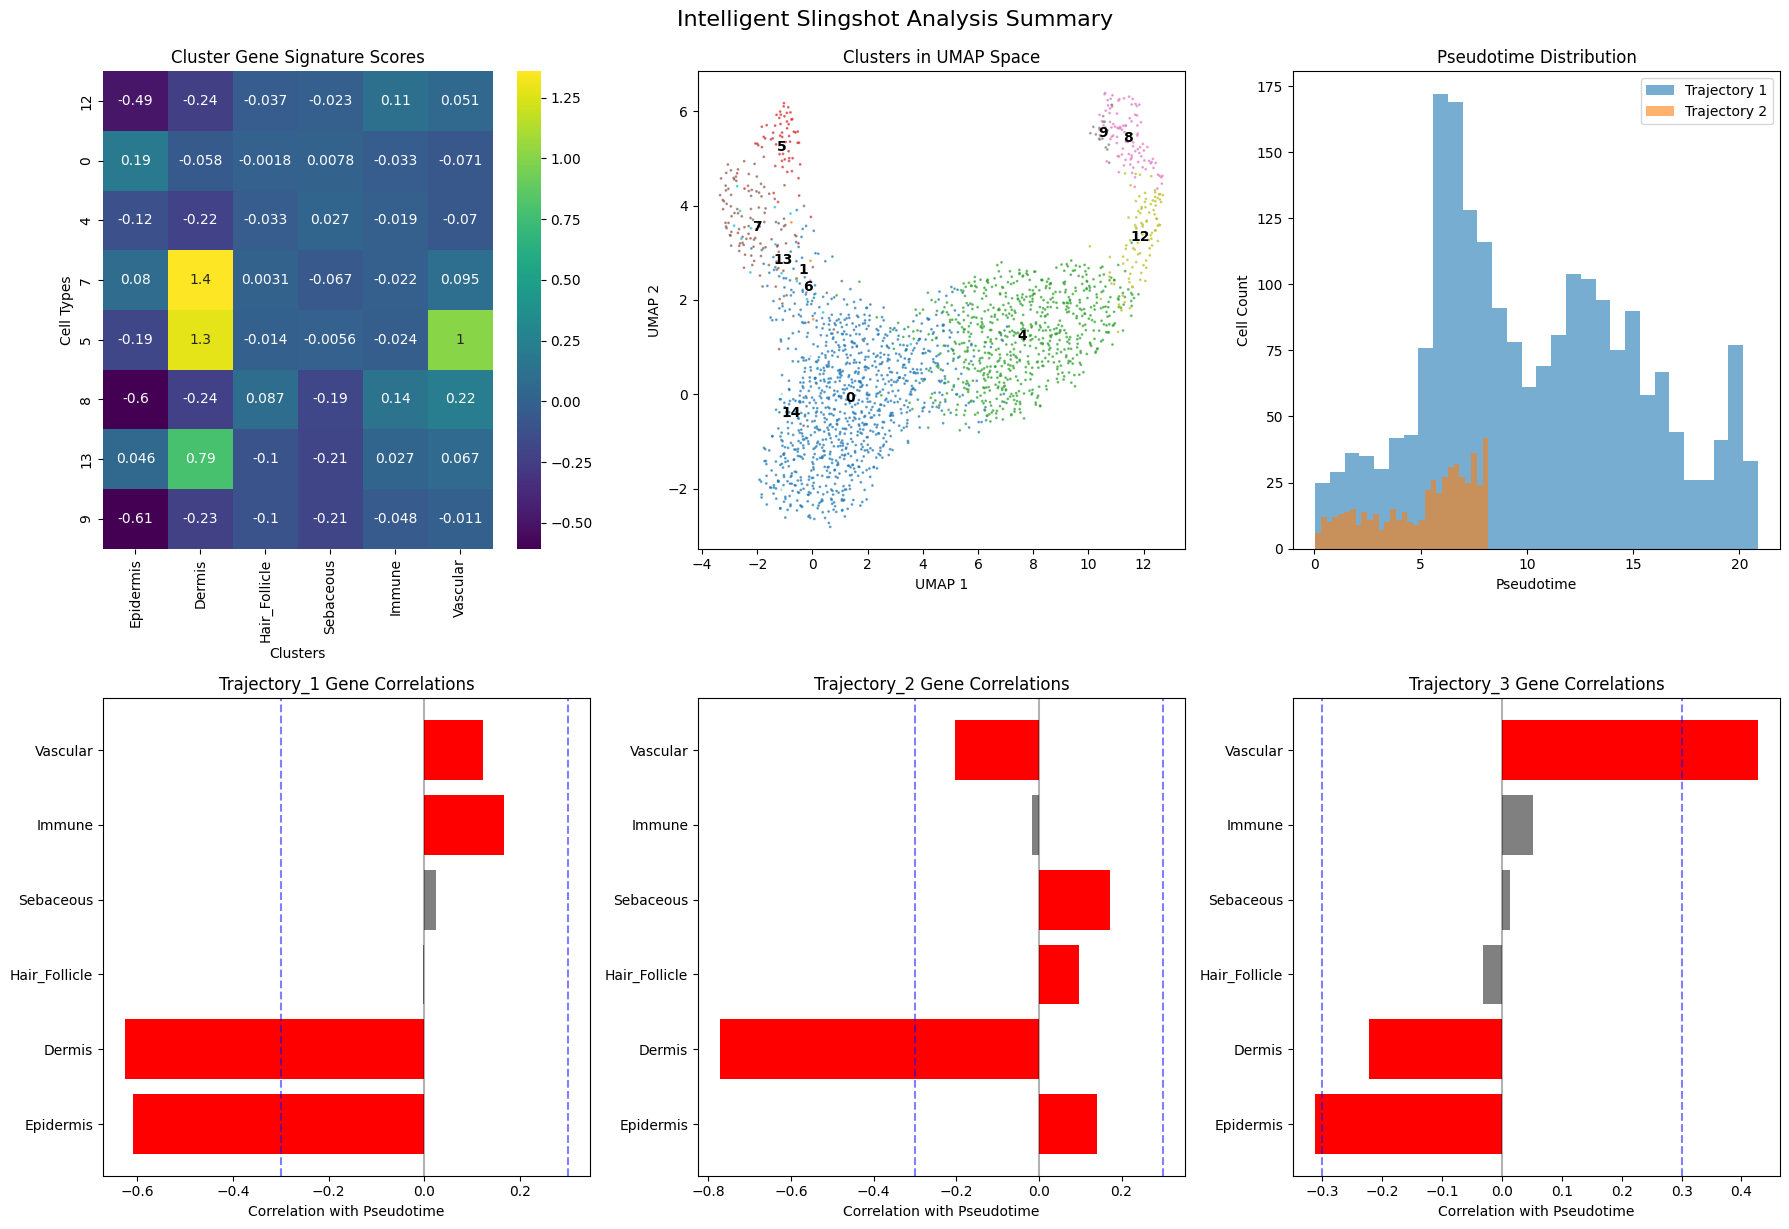

In [7]:
results = smart_slingshot_skin_analysis(
    cdata, 
    auto_infer=True,
    expected_trajectories=None
)

In [ ]:
def analyze_trajectory_cluster_transitions(
    adata, cluster_key="leiden_subset", embedding_key="X_umap_subset"
):
    """
    Analyze cluster transition patterns in Slingshot trajectories (excluding clusters with NaN average pseudotime)
    """

    # Get pseudotime columns
    pseudotime_cols = [
        col for col in adata.obs.columns if col.startswith("slingshot_pseudotime")
    ]

    if not pseudotime_cols:
        print("No Slingshot pseudotime results found")
        return

    print(
        f"Analyzing cluster transition patterns for {len(pseudotime_cols)} trajectories"
    )
    print("=" * 60)

    # Analyze cluster transitions for each trajectory
    trajectory_analysis = {}

    for i, pt_col in enumerate(pseudotime_cols):
        lineage_num = i + 1
        print(f"Trajectory {lineage_num} ({pt_col}):")
        print("-" * 40)

        # Get cells on this trajectory
        valid_mask = ~np.isnan(adata.obs[pt_col])
        if valid_mask.sum() == 0:
            print("No valid cells")
            continue

        # Extract data for this trajectory
        trajectory_data = adata.obs[valid_mask].copy()
        trajectory_data = trajectory_data.sort_values(pt_col)

        # Cluster distribution
        cluster_counts = trajectory_data[cluster_key].value_counts().sort_index()
        print(f"  Involved clusters: {', '.join(cluster_counts.index.astype(str))}")
        print(f"  Cell count distribution: {dict(cluster_counts)}")

        # Calculate average pseudotime for each cluster
        cluster_pseudotime = trajectory_data.groupby(cluster_key)[pt_col].agg(
            ["mean", "std", "min", "max", "count"]
        )

        # Key optimization: Exclude clusters with NaN average pseudotime
        valid_clusters_mask = ~np.isnan(cluster_pseudotime["mean"])
        cluster_pseudotime_filtered = cluster_pseudotime[valid_clusters_mask]

        if len(cluster_pseudotime_filtered) == 0:
            print("  Warning: No valid cluster data found for this trajectory")
            continue

        # Sort by average pseudotime
        cluster_pseudotime_filtered = cluster_pseudotime_filtered.sort_values("mean")

        print(f"  Valid clusters sorted by pseudotime:")
        for cluster_id, row in cluster_pseudotime_filtered.iterrows():
            std_str = f"{row['std']:.2f}" if not np.isnan(row["std"]) else "nan"
            print(
                f"Cluster {cluster_id}: Average pseudotime {row['mean']:.2f} ± {std_str} "
                f"(Range: {row['min']:.2f}-{row['max']:.2f}, Cell count: {row['count']})"
            )

        # Check for excluded clusters
        excluded_clusters = cluster_pseudotime[~valid_clusters_mask]
        if len(excluded_clusters) > 0:
            print(
                f"Excluded clusters (NaN average pseudotime): {', '.join([str(c) for c in excluded_clusters.index])}"
            )

        # Infer transition order (only include valid clusters)
        ordered_clusters = cluster_pseudotime_filtered.index.tolist()
        if len(ordered_clusters) > 1:
            transitions = " → ".join([str(c) for c in ordered_clusters])
            print(f"Inferred trajectory: {transitions}")
        elif len(ordered_clusters) == 1:
            print(f"Single cluster trajectory: {ordered_clusters[0]}")

        # Save analysis results
        trajectory_analysis[f"lineage_{lineage_num}"] = {
            "clusters_involved": ordered_clusters,  # Only include valid clusters
            "transition_path": ordered_clusters,  # Only include valid clusters
            "cluster_stats": cluster_pseudotime_filtered,  # Only include valid clusters' stats
            "excluded_clusters": (
                excluded_clusters.index.tolist() if len(excluded_clusters) > 0 else []
            ),  # Record excluded clusters
            "total_cells": valid_mask.sum(),
            "valid_clusters_count": len(ordered_clusters),
        }

    return trajectory_analysis

In [9]:
final_adata = results['final_adata'] 
trajectory_analysis = analyze_trajectory_cluster_transitions(final_adata)

Analyzing cluster transition patterns for 3 trajectories
Trajectory 1 (slingshot_pseudotime_1):
----------------------------------------
  Involved clusters: 0, 1, 2, 3, 4
  Cell count distribution: {'0': 875, '1': 608, '2': 228, '3': 225, '4': 182}
  Valid clusters sorted by pseudotime:
Cluster 2: Average pseudotime 2.58 ± 1.33 (Range: 0.04-5.03, Cell count: 228.0)
Cluster 0: Average pseudotime 7.23 ± 1.36 (Range: 4.19-10.76, Cell count: 875.0)
Cluster 1: Average pseudotime 12.70 ± 1.36 (Range: 9.90-15.52, Cell count: 608.0)
Cluster 3: Average pseudotime 16.24 ± 0.82 (Range: 14.18-18.09, Cell count: 225.0)
Cluster 4: Average pseudotime 19.57 ± 0.71 (Range: 17.94-20.88, Cell count: 182.0)
Inferred trajectory: 2 → 0 → 1 → 3 → 4
Trajectory 2 (slingshot_pseudotime_2):
----------------------------------------
  Involved clusters: 0, 1, 2, 3, 4
  Cell count distribution: {'0': 323, '1': 0, '2': 206, '3': 0, '4': 0}
  Valid clusters sorted by pseudotime:
Cluster 2: Average pseudotime 2.51 ± 

In [10]:
# Create trajectory-cluster transition visualization (optimized version)
def plot_trajectory_cluster_transitions(
    adata,
    trajectory_analysis,
    cluster_key="leiden_subset",
    embedding_key="X_umap_subset",
):
    """
    Visualize Slingshot trajectories with cluster transitions and pseudotime distribution
    """
    pseudotime_cols = [
        col for col in adata.obs.columns if col.startswith("slingshot_pseudotime")
    ]
    n_lineages = len(pseudotime_cols)

    fig, axes = plt.subplots(2, n_lineages, figsize=(5 * n_lineages, 10))
    if n_lineages == 1:
        axes = axes.reshape(-1, 1)

    umap_coords = adata.obsm[embedding_key]

    # Calculate cluster centers
    cluster_centers = {}
    unique_clusters = adata.obs[cluster_key].unique()
    for cluster in unique_clusters:
        cluster_mask = adata.obs[cluster_key] == cluster
        center = umap_coords[cluster_mask].mean(axis=0)
        cluster_centers[cluster] = center

    # Create a plot for each trajectory
    for i, (lineage_key, analysis) in enumerate(trajectory_analysis.items()):
        if i >= n_lineages:
            break

        pt_col = pseudotime_cols[i]

        # Top row: cluster plot with trajectory path
        ax1 = axes[0, i]

        # Draw all clusters (faded)
        for j, cluster in enumerate(unique_clusters):
            cluster_mask = adata.obs[cluster_key] == cluster
            ax1.scatter(
                umap_coords[cluster_mask, 0],
                umap_coords[cluster_mask, 1],
                label=f"Cluster {cluster}",
                alpha=0.3,
                s=15,
                color="lightgray",
            )

        # Highlight involved clusters
        involved_clusters = analysis["clusters_involved"]
        excluded_clusters = analysis["excluded_clusters"]

        # Draw involved clusters
        for cluster in involved_clusters:
            cluster_mask = adata.obs[cluster_key] == cluster
            ax1.scatter(
                umap_coords[cluster_mask, 0],
                umap_coords[cluster_mask, 1],
                label=f"Cluster {cluster}",
                alpha=0.7,
                s=30,
                color=plt.cm.Set1(involved_clusters.index(cluster)),
            )

            # Mark cluster centers
            center = cluster_centers[cluster]
            ax1.annotate(
                f"C{cluster}",
                (center[0], center[1]),
                xytext=(5, 5),
                textcoords="offset points",
                fontsize=12,
                fontweight="bold",
                color="black",
            )

        # Mark excluded clusters
        for cluster in excluded_clusters:
            cluster_mask = adata.obs[cluster_key] == cluster
            ax1.scatter(
                umap_coords[cluster_mask, 0],
                umap_coords[cluster_mask, 1],
                alpha=0.5,
                s=20,
                color="red",
                marker="x",
            )

            center = cluster_centers[cluster]
            ax1.annotate(
                f"C{cluster}(❌)",
                (center[0], center[1]),
                xytext=(5, 5),
                textcoords="offset points",
                fontsize=10,
                color="red",
                style="italic",
            )

        # Draw arrows between involved clusters
        if len(involved_clusters) > 1:
            for j in range(len(involved_clusters) - 1):
                start_cluster = involved_clusters[j]
                end_cluster = involved_clusters[j + 1]
                start_pos = cluster_centers[start_cluster]
                end_pos = cluster_centers[end_cluster]

                arrow = FancyArrowPatch(
                    start_pos,
                    end_pos,
                    arrowstyle="->",
                    mutation_scale=20,
                    color="red",
                    linewidth=3,
                    alpha=0.8,
                )
                ax1.add_patch(arrow)

        # Update title with valid path and excluded clusters
        valid_path = " → ".join([str(c) for c in involved_clusters])
        excluded_info = (
            f" (Excluded: {','.join(map(str, excluded_clusters))})"
            if excluded_clusters
            else ""
        )
        ax1.set_title(f"Trajectory {i+1}: {valid_path}{excluded_info}", fontsize=10)
        ax1.set_xlabel("UMAP1")
        ax1.set_ylabel("UMAP2")

        # Bottom row: Pseudotime distribution
        ax2 = axes[1, i]

        # Only show cells on this trajectory
        valid_mask = ~np.isnan(adata.obs[pt_col])

        if valid_mask.sum() > 0:
            scatter = ax2.scatter(
                umap_coords[valid_mask, 0],
                umap_coords[valid_mask, 1],
                c=adata.obs[pt_col][valid_mask],
                cmap="viridis",
                alpha=0.7,
                s=20,
            )
            plt.colorbar(scatter, ax=ax2, shrink=0.8)
            ax2.set_title(f"Trajectory {i+1} Pseudotime Distribution")
        else:
            ax2.text(0.5, 0.5, "No valid cells", ha="center", va="center")
            ax2.set_title(f"Trajectory {i+1} - No Data")

        ax2.set_xlabel("UMAP1")
        ax2.set_ylabel("UMAP2")

    plt.tight_layout()
    plt.show()

    return fig, axes

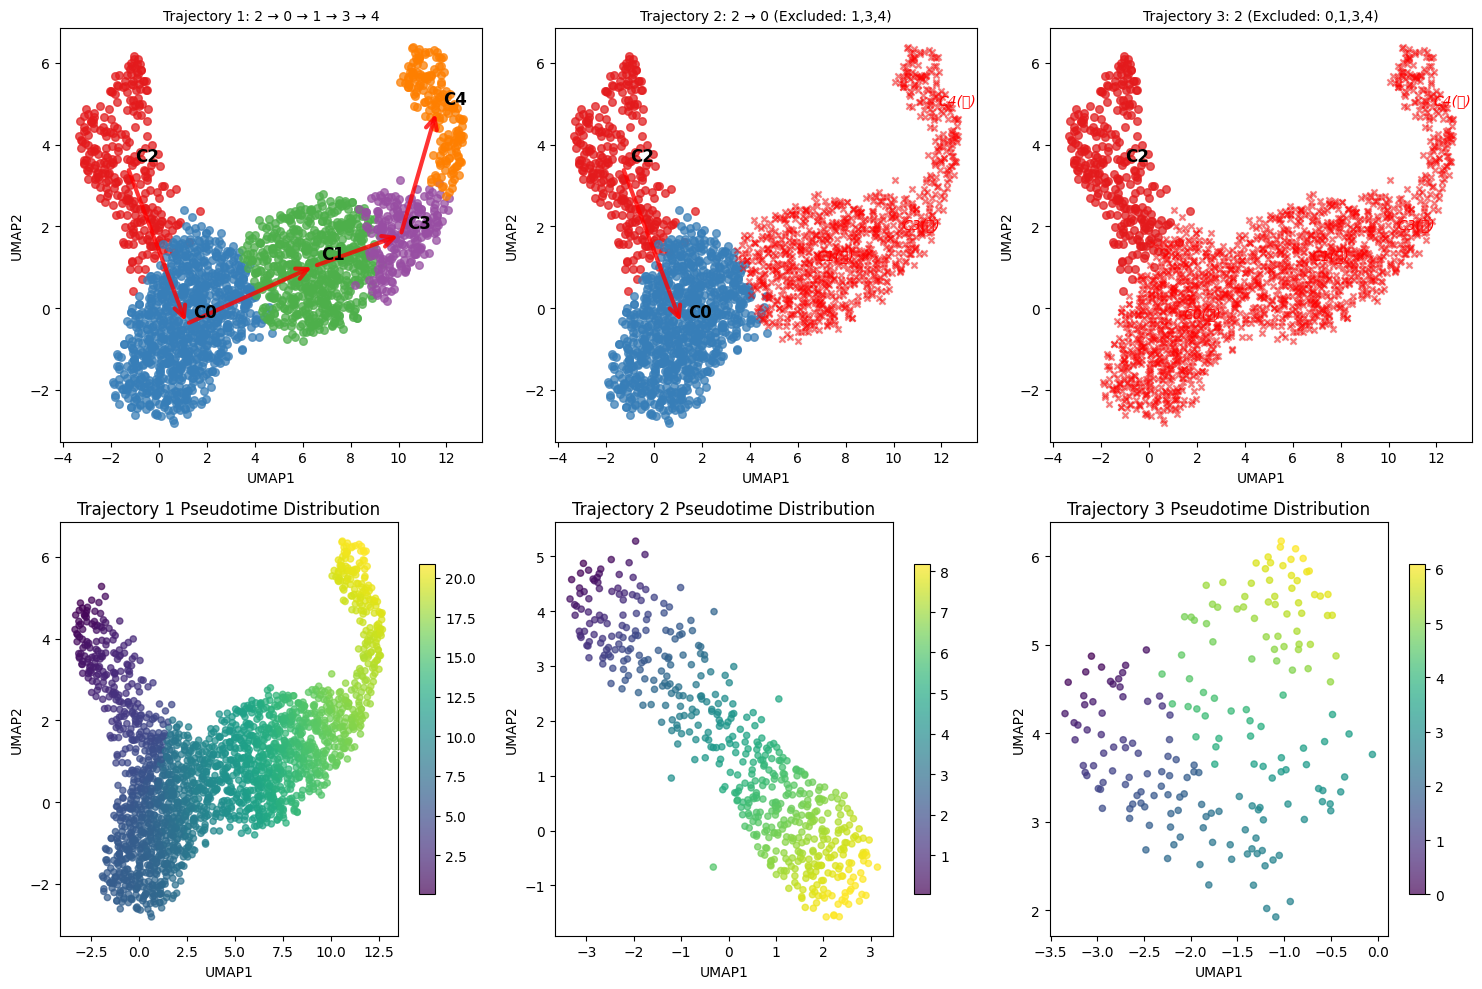

(<Figure size 1500x1000 with 9 Axes>,
 array([[<Axes: title={'center': 'Trajectory 1: 2 → 0 → 1 → 3 → 4'}, xlabel='UMAP1', ylabel='UMAP2'>,
         <Axes: title={'center': 'Trajectory 2: 2 → 0 (Excluded: 1,3,4)'}, xlabel='UMAP1', ylabel='UMAP2'>,
         <Axes: title={'center': 'Trajectory 3: 2 (Excluded: 0,1,3,4)'}, xlabel='UMAP1', ylabel='UMAP2'>],
        [<Axes: title={'center': 'Trajectory 1 Pseudotime Distribution'}, xlabel='UMAP1', ylabel='UMAP2'>,
         <Axes: title={'center': 'Trajectory 2 Pseudotime Distribution'}, xlabel='UMAP1', ylabel='UMAP2'>,
         <Axes: title={'center': 'Trajectory 3 Pseudotime Distribution'}, xlabel='UMAP1', ylabel='UMAP2'>]],
       dtype=object))

In [11]:
plot_trajectory_cluster_transitions(final_adata, trajectory_analysis)

In [15]:
def analyze_trajectory_relationships(trajectory_analysis):
    """
    Analyze relationships between trajectories to find subsets and branching points
    """
    print("="*60)
    
    relationships = []
    all_lineages = list(trajectory_analysis.keys())
    
    # Check each pair of trajectories for subset or branching relationships
    for i, lineage1 in enumerate(all_lineages):
        for j, lineage2 in enumerate(all_lineages):
            if i >= j:
                continue
                
            path1 = trajectory_analysis[lineage1]['clusters_involved']
            path2 = trajectory_analysis[lineage2]['clusters_involved']
            
            # Check for subset relationship
            if is_subpath(path1, path2):
                relationships.append({
                    'type': 'subset',
                    'shorter': lineage1,
                    'longer': lineage2,
                    'shorter_path': path1,
                    'longer_path': path2,
                    'divergence_point': len(path1),
                    'extension': path2[len(path1):]
                })
            elif is_subpath(path2, path1):
                relationships.append({
                    'type': 'subset',
                    'shorter': lineage2, 
                    'longer': lineage1,
                    'shorter_path': path2,
                    'longer_path': path1,
                    'divergence_point': len(path2),
                    'extension': path1[len(path2):]
                })
            else:
                # Check for common prefix
                common_prefix = find_common_prefix(path1, path2)
                if len(common_prefix) > 1:  # At least 2 common steps
                    relationships.append({
                        'type': 'branching',
                        'lineage1': lineage1,
                        'lineage2': lineage2,
                        'path1': path1,
                        'path2': path2,
                        'common_prefix': common_prefix,
                        'branch1': path1[len(common_prefix):],
                        'branch2': path2[len(common_prefix):],
                        'divergence_point': len(common_prefix)
                    })
    
    # Show results
    if not relationships:
        print("No relationships found between trajectories.")
        return relationships
    
    subset_relations = [r for r in relationships if r['type'] == 'subset']
    branching_relations = [r for r in relationships if r['type'] == 'branching']
    
    # Show subset relationships
    if subset_relations:
        print("\\n📦 Found subset relationships:")
        for rel in subset_relations:
            shorter_num = rel['shorter'].split('_')[1]
            longer_num = rel['longer'].split('_')[1]
            print(f"Trajectory {shorter_num} ⊆ Trajectory {longer_num}")
            print(f"Shorter path: {' → '.join(map(str, rel['shorter_path']))}")
            print(f"Longer path: {' → '.join(map(str, rel['longer_path']))}")
            print(f"Divergence point: Step {rel['divergence_point']} (Cluster {rel['shorter_path'][-1]})")
            print(f"Extension: {' → '.join(map(str, rel['extension']))}")

            # Analyze cell counts
            shorter_cells = trajectory_analysis[rel['shorter']]['total_cells']
            longer_cells = trajectory_analysis[rel['longer']]['total_cells']
            print(f"    Cell counts: Shorter ({shorter_cells}) vs Longer ({longer_cells})")

    # Show branching relationships
    if branching_relations:
        print("Found branching relationships:")
        for rel in branching_relations:
            lineage1_num = rel['lineage1'].split('_')[1]
            lineage2_num = rel['lineage2'].split('_')[1]
            print(f"Trajectory {lineage1_num} ↔ Trajectory {lineage2_num}")
            print(f"Common prefix: {' → '.join(map(str, rel['common_prefix']))}")
            print(f"Branch 1: {' → '.join(map(str, rel['branch1']))}")
            print(f"Branch 2: {' → '.join(map(str, rel['branch2']))}")
            print(f"Divergence point: Step {rel['divergence_point']} (Cluster {rel['common_prefix'][-1]})")

    return relationships

def is_subpath(shorter_path, longer_path):
    """Check if shorter_path is a prefix of longer_path"""
    if len(shorter_path) > len(longer_path):
        return False
    return shorter_path == longer_path[:len(shorter_path)]

def find_common_prefix(path1, path2):
    """Find the common prefix between two paths"""
    common = []
    for i in range(min(len(path1), len(path2))):
        if path1[i] == path2[i]:
            common.append(path1[i])
        else:
            break
    return common

def suggest_trajectory_merging(trajectory_analysis, relationships):
    """
    Based on subset relationships, suggest trajectory merging
    """
    print("="*50)
    
    subset_relations = [r for r in relationships if r['type'] == 'subset']
    
    if not subset_relations:
        print("No subset relationships found, no merging suggestions.")
        return
    
    for rel in subset_relations:
        shorter_num = rel['shorter'].split('_')[1]
        longer_num = rel['longer'].split('_')[1]

        print(f"Suggest merging Trajectory {shorter_num} and Trajectory {longer_num}:")
        print(f"Reason: Trajectory {shorter_num} is a complete subset of Trajectory {longer_num}")

        # Analyze biological significance based on cell counts
        shorter_cells = trajectory_analysis[rel['shorter']]['total_cells']
        longer_cells = trajectory_analysis[rel['longer']]['total_cells']
        
        if shorter_cells > longer_cells * 0.8:
            print(f"biological explanation: Possible early differentiation stalling")
            print(f"- Most cells remain at cluster {rel['shorter_path'][-1]} (differentiation point)")
            print(f"- Some cells continue to differentiate into {' → '.join(map(str, rel['extension']))}")
        else:
            print(f"biological explanation: Possible branching differentiation")
            print(f"- main differentiation path: {' → '.join(map(str, rel['longer_path']))}")
            print(f"- Some cells terminate early at cluster {rel['shorter_path'][-1]}")
        
        print(f"the unified after merging path:  {' → '.join(map(str, rel['longer_path']))}")
        print(f"key differentiation point: Cluster {rel['shorter_path'][-1]} → Cluster {rel['extension'][0] if rel['extension'] else 'N/A'}")

In [16]:
relationships = analyze_trajectory_relationships(trajectory_analysis)

\n📦 Found subset relationships:
Trajectory 2 ⊆ Trajectory 1
Shorter path: 2 → 0
Longer path: 2 → 0 → 1 → 3 → 4
Divergence point: Step 2 (Cluster 0)
Extension: 1 → 3 → 4
    Cell counts: Shorter (529) vs Longer (2118)
Trajectory 3 ⊆ Trajectory 1
Shorter path: 2
Longer path: 2 → 0 → 1 → 3 → 4
Divergence point: Step 1 (Cluster 2)
Extension: 0 → 1 → 3 → 4
    Cell counts: Shorter (196) vs Longer (2118)
Trajectory 3 ⊆ Trajectory 2
Shorter path: 2
Longer path: 2 → 0
Divergence point: Step 1 (Cluster 2)
Extension: 0
    Cell counts: Shorter (196) vs Longer (529)


In [19]:
def merge_subset_trajectories(adata, trajectory_analysis, relationships, merge_strategy='keep_longer'):
    """
    Merge trajectories that have subset relationships.
    """
    print("Executing trajectory merging based on subset relationships")
    print("="*50)
    
    subset_relations = [r for r in relationships if r['type'] == 'subset']
    
    if not subset_relations:
        print("No subset relationships found, no merging needed.")
        return trajectory_analysis
    
    merged_analysis = trajectory_analysis.copy()
    
    for rel in subset_relations:
        shorter_key = rel['shorter']
        longer_key = rel['longer']
        shorter_num = shorter_key.split('_')[1]
        longer_num = longer_key.split('_')[1]
        
        print(f"Merged trajectory {shorter_num} into {longer_num}")
        
        if merge_strategy == 'keep_longer':
            if shorter_key in merged_analysis:
                del merged_analysis[shorter_key]

            if longer_key in merged_analysis:
                merged_analysis[longer_key]['merger_info'] = {
                    'merged_from': shorter_key,
                    'divergence_point': rel['divergence_point'],
                    'divergence_cluster': rel['shorter_path'][-1],
                    'extension_path': rel['extension'],
                    'cells_before_divergence': trajectory_analysis[shorter_key]['total_cells'],
                    'cells_after_divergence': trajectory_analysis[longer_key]['total_cells'] - trajectory_analysis[shorter_key]['total_cells']
                }
            
        elif merge_strategy == 'keep_shorter':
            # Keep the shorter trajectory as the main path and mark the longer trajectory as an extension
            print(f"Strategy: Keep main trajectory {shorter_num}, mark trajectory {longer_num} as extension")
            merged_analysis[shorter_key]['extension_info'] = {
                'extended_in': longer_key,
                'extension_path': rel['extension'],
                'total_extended_cells': trajectory_analysis[longer_key]['total_cells']
            }
            del merged_analysis[longer_key]
            
        elif merge_strategy == 'combine':
            # Combine the paths into a new trajectory
            combined_key = f"combined_{shorter_num}_{longer_num}"
            merged_analysis[combined_key] = {
                'clusters_involved': rel['longer_path'],
                'transition_path': rel['longer_path'],
                'main_branch': rel['shorter_path'],
                'extension_branch': rel['extension'],
                'divergence_point': rel['divergence_point'],
                'divergence_cluster': rel['shorter_path'][-1],
                'main_branch_cells': trajectory_analysis[shorter_key]['total_cells'],
                'extension_cells': trajectory_analysis[longer_key]['total_cells'] - trajectory_analysis[shorter_key]['total_cells'],
                'total_cells': trajectory_analysis[longer_key]['total_cells'],
                'original_trajectories': [shorter_key, longer_key]
            }
            # Delete the original trajectories
            del merged_analysis[shorter_key]
            del merged_analysis[longer_key]
    
    return merged_analysis

def visualize_merged_trajectories(adata, merged_analysis, embedding_key='X_umap_subset'):
    """
    Visualize the merged trajectories in UMAP space
    """
    import matplotlib.pyplot as plt
    import numpy as np

    print("Visualize the merged trajectories")
    print("="*40)
    
    remaining_trajectories = list(merged_analysis.keys())
    n_traj = len(remaining_trajectories)
    
    if n_traj == 0:
        print("No trajectories to visualize")
        return
    
    fig, axes = plt.subplots(1, n_traj, figsize=(6*n_traj, 6))
    if n_traj == 1:
        axes = [axes]
    
    umap_coords = adata.obsm[embedding_key]
    
    for i, (traj_key, traj_info) in enumerate(merged_analysis.items()):
        ax = axes[i]
        
        # Get trajectories
        if 'clusters_involved' in traj_info:
            clusters = traj_info['clusters_involved']
        else:
            continue

        colors = plt.cm.viridis(np.linspace(0, 1, len(clusters)))
        
        for j, cluster in enumerate(clusters):
            cluster_mask = adata.obs['leiden_subset'] == cluster
            ax.scatter(umap_coords[cluster_mask, 0], umap_coords[cluster_mask, 1], 
                      color=colors[j], alpha=0.6, s=30, label=f'C{cluster}')
        
        # Mark special information
        if 'merger_info' in traj_info:
            info = traj_info['merger_info']
            div_cluster = info['divergence_cluster']
            ax.set_title(f'{traj_key.replace("_", " ").title()}\\n'
                        f'(Merging trajectories, divergence points: C{div_cluster})')
        elif 'extension_info' in traj_info:
            ax.set_title(f'{traj_key.replace("_", " ").title()} (Main trajectory)')
        elif 'combined' in traj_key:
            info = traj_info
            div_cluster = info['divergence_cluster']
            ax.set_title(f'Combined trajectory (Divergence point: C{div_cluster})')
        else:
            ax.set_title(f'{traj_key.replace("_", " ").title()}')
        
        ax.set_xlabel('UMAP1')
        ax.set_ylabel('UMAP2')
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    
    plt.tight_layout()
    plt.show()


print("Trajectory Merging Strategies:")
print("1. keep_longer: keep the longer trajectory, remove the shorter one")
print("2. keep_shorter: keep the shorter trajectory as the main path, mark the longer one as an extension")
print("3. combine: create a combined trajectory, including divergence information")
print("4. no_merge: keep the original trajectories unchanged")

Trajectory Merging Strategies:
1. keep_longer: keep the longer trajectory, remove the shorter one
2. keep_shorter: keep the shorter trajectory as the main path, mark the longer one as an extension
3. combine: create a combined trajectory, including divergence information
4. no_merge: keep the original trajectories unchanged


Default strategy: keep_longer
Executing trajectory merging based on subset relationships
Merged trajectory 2 into 1
Merged trajectory 3 into 1
Merged trajectory 3 into 2
Summary of Merged Trajectories:
Lineage 1:
Trajectory: 2 → 0 → 1 → 3 → 4
Cell Count: 2118
Divergence Information:
Divergence Point: Cluster 2
Main Branch Cells: 196
Extension Cells: 1922
Extension Path: 0 → 1 → 3 → 4
Visualize the merged trajectories


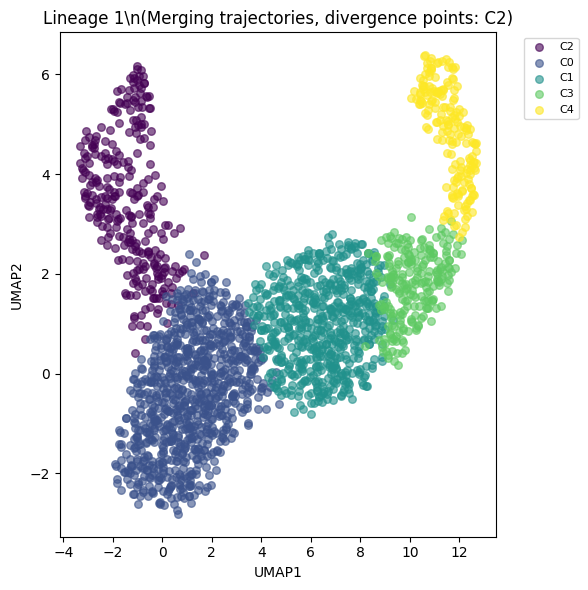

In [20]:
# Default strategy(keep_longer)
print("Default strategy: keep_longer")
merged_trajectory_analysis = merge_subset_trajectories(final_adata, trajectory_analysis, relationships, 'keep_longer')

# Show
print("Summary of Merged Trajectories:")
print("="*50)
for traj_key, traj_info in merged_trajectory_analysis.items():
    traj_num = traj_key.split('_')[1] if '_' in traj_key else traj_key
    path = ' → '.join(map(str, traj_info['clusters_involved']))
    cells = traj_info['total_cells']
    
    print(f"{traj_key.replace('_', ' ').title()}:")
    print(f"Trajectory: {path}")
    print(f"Cell Count: {cells}")

    if 'merger_info' in traj_info:
        merger = traj_info['merger_info']
        print(f"Divergence Information:")
        print(f"Divergence Point: Cluster {merger['divergence_cluster']}")
        print(f"Main Branch Cells: {merger['cells_before_divergence']}")
        print(f"Extension Cells: {merger['cells_after_divergence']}")
        print(f"Extension Path: {' → '.join(map(str, merger['extension_path']))}")

visualize_merged_trajectories(final_adata, merged_trajectory_analysis)